# Product Recommendation System - Data Analysis

This notebook provides comprehensive exploratory data analysis (EDA) for the product recommendation system.

## Table of Contents
1. Data Loading & Overview
   - 1.1 Data Cleaning (Remove zero price items)
2. User Analysis (Loyal vs New Customers)
3. Product Analysis
4. Transaction Patterns
5. Price Distribution Analysis
6. Co-purchase Analysis
7. Temporal Analysis
8. Sparsity Analysis
9. Recommendations for Model Selection
10. Item Price Variation Over Time
11. Price Elasticity Analysis
12. User Spending Behavior Analysis
13. Insights Interpretation for Recommendation System

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print('Libraries loaded successfully!')

Libraries loaded successfully!


## 1. Data Loading & Overview

In [34]:
# Load the data
xlsx = pd.ExcelFile('../data/Data Science - Assignment.xlsx')
print(f'Available sheets: {xlsx.sheet_names}')

# Load both datasets
loyal_df = pd.read_excel(xlsx, sheet_name='Loyal Customers')
new_df = pd.read_excel(xlsx, sheet_name='New Customers')

# Standardize column names
loyal_df.columns = ['pos_number', 'ticket_number', 'ticket_datetime', 'ticket_amount', 
                    'user_id', 'item_id', 'units_sold', 'item_price']
new_df.columns = ['ticket_number', 'pos_number', 'ticket_datetime', 'ticket_amount', 
                  'user_id', 'item_id', 'units_sold', 'item_price']

# Convert item_id to string for consistency
loyal_df['item_id'] = loyal_df['item_id'].astype(str)
new_df['item_id'] = new_df['item_id'].astype(str)

print(f'\nLoyal Customers Dataset: {loyal_df.shape}')
print(f'New Customers Dataset: {new_df.shape}')

Available sheets: ['Loyal Customers', 'New Customers']

Loyal Customers Dataset: (74164, 8)
New Customers Dataset: (3628, 8)


In [35]:
# Display dataset info
print('=== LOYAL CUSTOMERS ===')
print(loyal_df.info())
print('\nFirst 5 rows:')
display(loyal_df.head())

print('\n=== NEW CUSTOMERS ===')
print(new_df.info())
print('\nFirst 5 rows:')
display(new_df.head())

=== LOYAL CUSTOMERS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74164 entries, 0 to 74163
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pos_number       74164 non-null  int64         
 1   ticket_number    74164 non-null  int64         
 2   ticket_datetime  74164 non-null  datetime64[ns]
 3   ticket_amount    74164 non-null  float64       
 4   user_id          74164 non-null  int64         
 5   item_id          74164 non-null  object        
 6   units_sold       74164 non-null  int64         
 7   item_price       74164 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 4.5+ MB
None

First 5 rows:


,pos_number,ticket_number,ticket_datetime,ticket_amount,user_id,item_id,units_sold,item_price
0,1,19,2025-11-29 09:13:00,73.0,41786230378,7003858505,2,1.99
1,1,19,2025-11-29 09:13:00,73.0,41786230378,150,3,1.99
2,1,19,2025-11-29 09:13:00,73.0,41786230378,7003864375,1,2.45
3,1,19,2025-11-29 09:13:00,73.0,41786230378,1590006105,1,4.88
4,1,19,2025-11-29 09:13:00,73.0,41786230378,1590006000,1,4.88



=== NEW CUSTOMERS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628 entries, 0 to 3627
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ticket_number    3628 non-null   int64         
 1   pos_number       3628 non-null   int64         
 2   ticket_datetime  3628 non-null   datetime64[ns]
 3   ticket_amount    3628 non-null   float64       
 4   user_id          3628 non-null   int64         
 5   item_id          3628 non-null   object        
 6   units_sold       3628 non-null   int64         
 7   item_price       3628 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 226.9+ KB
None

First 5 rows:


,ticket_number,pos_number,ticket_datetime,ticket_amount,user_id,item_id,units_sold,item_price
0,155,1,2025-12-16 12:47:00,108.28,41859244564,7294560133,1,3.29
1,155,1,2025-12-16 12:47:00,108.28,41859244564,2840051779,1,7.29
2,155,1,2025-12-16 12:47:00,108.28,41859244564,1200000017,1,10.99
3,155,1,2025-12-16 12:47:00,108.28,41859244564,7206000111,3,2.39
4,155,1,2025-12-16 12:47:00,108.28,41859244564,7206000813,3,3.19


In [36]:
# Summary statistics
def generate_summary(df, name):
    summary = {
        'Dataset': name,
        'Total Transactions': len(df),
        'Unique Users': df['user_id'].nunique(),
        'Unique Items': df['item_id'].nunique(),
        'Unique Tickets': df['ticket_number'].nunique(),
        'Date Range Start': df['ticket_datetime'].min(),
        'Date Range End': df['ticket_datetime'].max(),
        'Avg Items per User': len(df) / df['user_id'].nunique(),
        'Avg Items per Ticket': len(df) / df['ticket_number'].nunique(),
        'Price Min': df['item_price'].min(),
        'Price Max': df['item_price'].max(),
        'Price Mean': df['item_price'].mean(),
        'Null Values': df.isnull().sum().sum()
    }
    return summary

summary_df = pd.DataFrame([generate_summary(loyal_df, 'Loyal'), generate_summary(new_df, 'New')])
display(summary_df.T)

,0,1
Dataset,Loyal,New
Total Transactions,74164,3628
Unique Users,70,50
Unique Items,10148,1997
Unique Tickets,680,121
Date Range Start,2024-07-01 07:54:00,2025-12-01 09:33:00
Date Range End,2026-01-03 19:39:00,2025-12-31 15:53:00
Avg Items per User,1059.485714,72.56
Avg Items per Ticket,109.064706,29.983471
Price Min,0.0,0.0


### 1.1 Data Cleaning

Before proceeding with analysis, we need to clean the data by removing items with zero average price. These are likely promotional items, samples, or data entry errors that could skew our analysis.

In [37]:
# Identify items with zero average price
print('=== IDENTIFYING ZERO PRICE ITEMS ===')

# Calculate average price per item
loyal_item_avg_price = loyal_df.groupby('item_id')['item_price'].mean()
new_item_avg_price = new_df.groupby('item_id')['item_price'].mean()

# Find items with zero average price
zero_price_items_loyal = loyal_item_avg_price[loyal_item_avg_price == 0].index.tolist()
zero_price_items_new = new_item_avg_price[new_item_avg_price == 0].index.tolist()

print(f'\nLoyal Customers - Zero price items: {zero_price_items_loyal}')
print(f'New Customers - Zero price items: {zero_price_items_new}')

# Count occurrences of zero price items
print('\nOccurrences of zero price items in Loyal data:')
for item in zero_price_items_loyal:
    count = (loyal_df['item_id'] == item).sum()
    print(f'  - Item "{item}": {count} occurrences')

print('\nOccurrences of zero price items in New data:')
for item in zero_price_items_new:
    count = (new_df['item_id'] == item).sum()
    print(f'  - Item "{item}": {count} occurrences')

# Combine all zero price items
all_zero_price_items = list(set(zero_price_items_loyal + zero_price_items_new))
print(f'\nTotal unique zero price items to remove: {all_zero_price_items}')

=== IDENTIFYING ZERO PRICE ITEMS ===

Loyal Customers - Zero price items: ['200', '20098500000', '501', '7675006570', '7675051299', '7675051325', '7675053740', '7675054685', 'OPEN DEPT 101', 'OPEN DEPT 102', 'OPEN DEPT 103', 'OPEN DEPT 104', 'OPEN DEPT 105', 'OPEN DEPT 106', 'OPEN DEPT 107', 'OPEN DEPT 108', 'OPEN DEPT 109', 'OPEN DEPT 110', 'OPEN DEPT 111', 'OPEN DEPT 112', 'OPEN DEPT 113', 'OPEN DEPT 129', 'OPEN DEPT 130', 'OPEN DEPT 131', 'OPEN DEPT 134', 'OPEN DEPT 135']
New Customers - Zero price items: ['200', '20098100000', '20098300000', '20098600000', '20098700000', '20098800000', '20098900000', '20099100000', 'OPEN DEPT 101', 'OPEN DEPT 102', 'OPEN DEPT 107', 'OPEN DEPT 109', 'OPEN DEPT 110', 'OPEN DEPT 135']

Occurrences of zero price items in Loyal data:
  - Item "200": 3421 occurrences
  - Item "20098500000": 4 occurrences
  - Item "501": 3 occurrences
  - Item "7675006570": 1 occurrences
  - Item "7675051299": 1 occurrences
  - Item "7675051325": 10 occurrences
  - Item "

In [38]:
# Remove zero price items from both datasets
print('=== DATA CLEANING: REMOVING ZERO PRICE ITEMS ===')

# Store original counts
loyal_original_count = len(loyal_df)
new_original_count = len(new_df)

# Remove rows with zero price items
loyal_df = loyal_df[~loyal_df['item_id'].isin(all_zero_price_items)]
new_df = new_df[~new_df['item_id'].isin(all_zero_price_items)]

# Calculate removed counts
loyal_removed = loyal_original_count - len(loyal_df)
new_removed = new_original_count - len(new_df)

print(f'\nLoyal Customers:')
print(f'  - Original records: {loyal_original_count:,}')
print(f'  - Records removed: {loyal_removed:,} ({loyal_removed/loyal_original_count*100:.2f}%)')
print(f'  - Cleaned records: {len(loyal_df):,}')

print(f'\nNew Customers:')
print(f'  - Original records: {new_original_count:,}')
print(f'  - Records removed: {new_removed:,} ({new_removed/new_original_count*100:.2f}%)')
print(f'  - Cleaned records: {len(new_df):,}')

print(f'\nData cleaning complete! Zero price items removed: {all_zero_price_items}')

=== DATA CLEANING: REMOVING ZERO PRICE ITEMS ===

Loyal Customers:
  - Original records: 74,164
  - Records removed: 5,974 (8.06%)
  - Cleaned records: 68,190

New Customers:
  - Original records: 3,628
  - Records removed: 217 (5.98%)
  - Cleaned records: 3,411

Data cleaning complete! Zero price items removed: ['20098100000', '20099100000', 'OPEN DEPT 112', 'OPEN DEPT 135', 'OPEN DEPT 105', 'OPEN DEPT 104', 'OPEN DEPT 108', 'OPEN DEPT 111', 'OPEN DEPT 101', 'OPEN DEPT 130', 'OPEN DEPT 103', 'OPEN DEPT 107', '7675006570', '7675051325', '20098300000', '200', '20098600000', '7675051299', '7675053740', 'OPEN DEPT 134', 'OPEN DEPT 131', '20098500000', '7675054685', 'OPEN DEPT 102', '20098900000', 'OPEN DEPT 113', 'OPEN DEPT 129', '501', 'OPEN DEPT 106', '20098800000', '20098700000', 'OPEN DEPT 110', 'OPEN DEPT 109']


In [39]:
# Regenerate summary statistics after cleaning
print('=== UPDATED SUMMARY AFTER CLEANING ===\n')

summary_df_cleaned = pd.DataFrame([generate_summary(loyal_df, 'Loyal (Cleaned)'), 
                                    generate_summary(new_df, 'New (Cleaned)')])
display(summary_df_cleaned.T)

print('\nNote: All subsequent analysis uses the cleaned data (zero price items removed).')

=== UPDATED SUMMARY AFTER CLEANING ===



,0,1
Dataset,Loyal (Cleaned),New (Cleaned)
Total Transactions,68190,3411
Unique Users,70,50
Unique Items,10115,1983
Unique Tickets,679,121
Date Range Start,2024-07-01 07:54:00,2025-12-01 09:33:00
Date Range End,2026-01-03 19:39:00,2025-12-31 15:53:00
Avg Items per User,974.142857,68.22
Avg Items per Ticket,100.427099,28.190083
Price Min,0.0,0.05



Note: All subsequent analysis uses the cleaned data (zero price items removed).


## 2. User Analysis

In [40]:
# User purchase frequency for loyal customers
loyal_user_stats = loyal_df.groupby('user_id').agg({
    'item_id': 'count',
    'ticket_number': 'nunique',
    'item_price': ['sum', 'mean'],
    'units_sold': 'sum'
}).round(2)
loyal_user_stats.columns = ['total_items', 'num_transactions', 'total_spent', 'avg_item_price', 'total_units']
loyal_user_stats = loyal_user_stats.sort_values('total_items', ascending=False)

print('Top 10 Loyal Customers by Purchase Volume:')
display(loyal_user_stats.head(10))

print(f'\nLoyal User Statistics:')
print(loyal_user_stats.describe())

Top 10 Loyal Customers by Purchase Volume:


,total_items,num_transactions,total_spent,avg_item_price,total_units
user_id,,,,,
41456069174,7385,266,30075.05,4.07,9212
41126839657,3431,189,15580.62,4.54,4238
41416221680,2791,283,13840.60,4.96,3522
41706774086,2744,210,11757.61,4.28,3080
41259840571,1988,189,7231.32,3.64,2210
41822888993,1736,259,6388.53,3.68,2424
41527877334,1726,194,6721.12,3.89,2078
41168518931,1711,114,7431.01,4.34,2306
41714019299,1689,146,6611.48,3.91,2791



Loyal User Statistics:
       total_items  num_transactions   total_spent  avg_item_price  \
count    70.000000          70.00000     70.000000       70.000000   
mean    974.142857         128.90000   4084.411143        4.105429   
std    1013.797614          67.93521   4315.689929        0.602304   
min     115.000000          29.00000    283.540000        2.470000   
25%     413.250000          73.25000   1700.045000        3.855000   
50%     740.500000         106.00000   2940.575000        4.095000   
75%    1181.000000         185.25000   5290.307500        4.422500   
max    7385.000000         283.00000  30075.050000        6.110000   

       total_units  
count    70.000000  
mean   1228.600000  
std    1274.524593  
min     117.000000  
25%     500.250000  
50%     974.000000  
75%    1549.250000  
max    9212.000000  


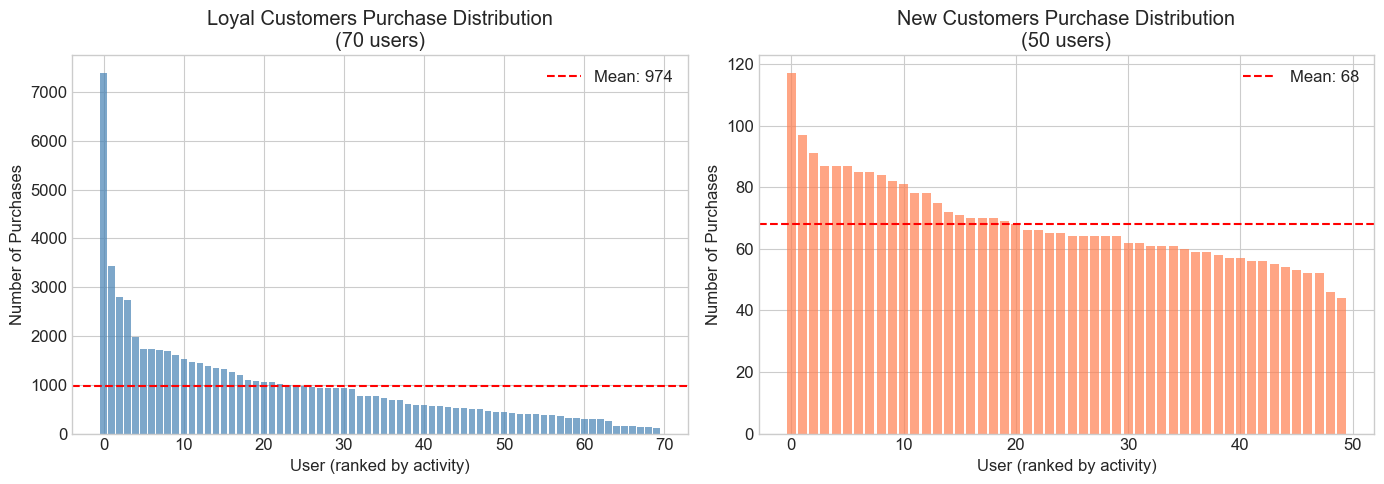

In [41]:
# Visualize user purchase distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loyal customers
loyal_user_counts = loyal_df.groupby('user_id').size().sort_values(ascending=False)
axes[0].bar(range(len(loyal_user_counts)), loyal_user_counts.values, color='steelblue', alpha=0.7)
axes[0].set_xlabel('User (ranked by activity)')
axes[0].set_ylabel('Number of Purchases')
axes[0].set_title(f'Loyal Customers Purchase Distribution\n({len(loyal_user_counts)} users)')
axes[0].axhline(y=loyal_user_counts.mean(), color='red', linestyle='--', label=f'Mean: {loyal_user_counts.mean():.0f}')
axes[0].legend()

# New customers
new_user_counts = new_df.groupby('user_id').size().sort_values(ascending=False)
axes[1].bar(range(len(new_user_counts)), new_user_counts.values, color='coral', alpha=0.7)
axes[1].set_xlabel('User (ranked by activity)')
axes[1].set_ylabel('Number of Purchases')
axes[1].set_title(f'New Customers Purchase Distribution\n({len(new_user_counts)} users)')
axes[1].axhline(y=new_user_counts.mean(), color='red', linestyle='--', label=f'Mean: {new_user_counts.mean():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

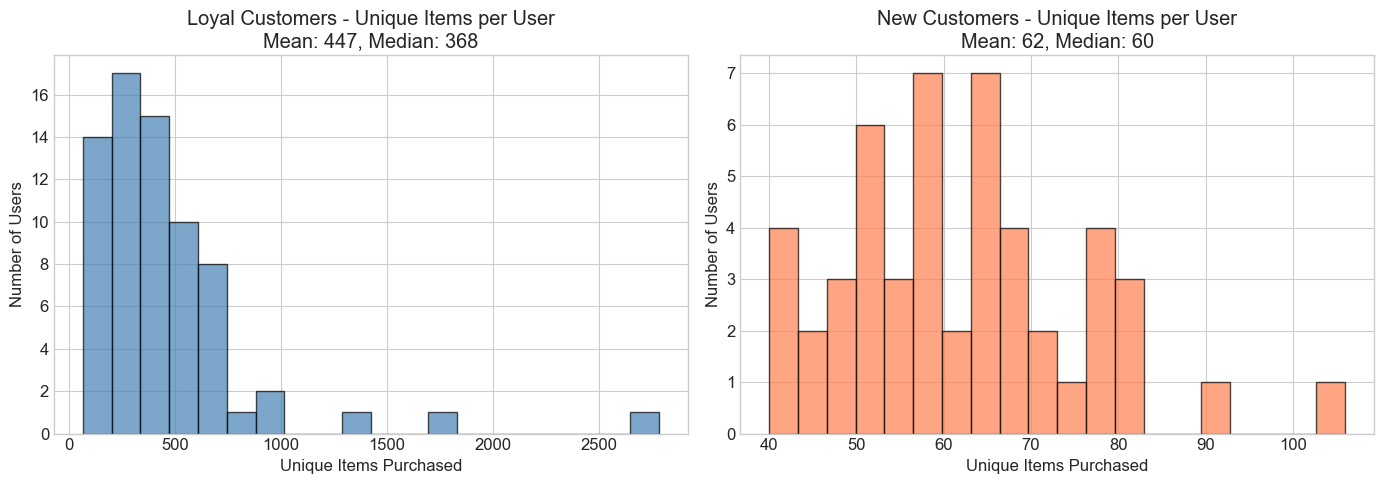

In [42]:
# User diversity - How many unique items does each user buy?
loyal_user_diversity = loyal_df.groupby('user_id')['item_id'].nunique().sort_values(ascending=False)
new_user_diversity = new_df.groupby('user_id')['item_id'].nunique().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(loyal_user_diversity, bins=20, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Unique Items Purchased')
axes[0].set_ylabel('Number of Users')
axes[0].set_title(f'Loyal Customers - Unique Items per User\nMean: {loyal_user_diversity.mean():.0f}, Median: {loyal_user_diversity.median():.0f}')

axes[1].hist(new_user_diversity, bins=20, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Unique Items Purchased')
axes[1].set_ylabel('Number of Users')
axes[1].set_title(f'New Customers - Unique Items per User\nMean: {new_user_diversity.mean():.0f}, Median: {new_user_diversity.median():.0f}')

plt.tight_layout()
plt.show()

## 3. Product Analysis

In [43]:
# Item popularity distribution for loyal customers
loyal_item_popularity = loyal_df.groupby('item_id').agg({
    'user_id': 'nunique',
    'ticket_number': 'count',
    'units_sold': 'sum',
    'item_price': 'mean'
}).round(2)
loyal_item_popularity.columns = ['unique_buyers', 'purchase_count', 'total_units', 'avg_price']
loyal_item_popularity = loyal_item_popularity.sort_values('purchase_count', ascending=False)

print('Top 20 Most Popular Items (Loyal Customers):')
display(loyal_item_popularity.head(20))

Top 20 Most Popular Items (Loyal Customers):


,unique_buyers,purchase_count,total_units,avg_price
item_id,,,,
4011,60,872,880,0.74
7206000117,58,834,924,4.00
7206000717,49,450,483,3.86
7800008240,31,355,372,2.32
7294560153,48,321,397,2.77
7003858505,47,315,399,3.79
7206000111,47,310,407,2.77
4799,46,303,303,1.84
7800008246,23,296,447,2.65


2831 items (28.0%) account for 80% of purchases


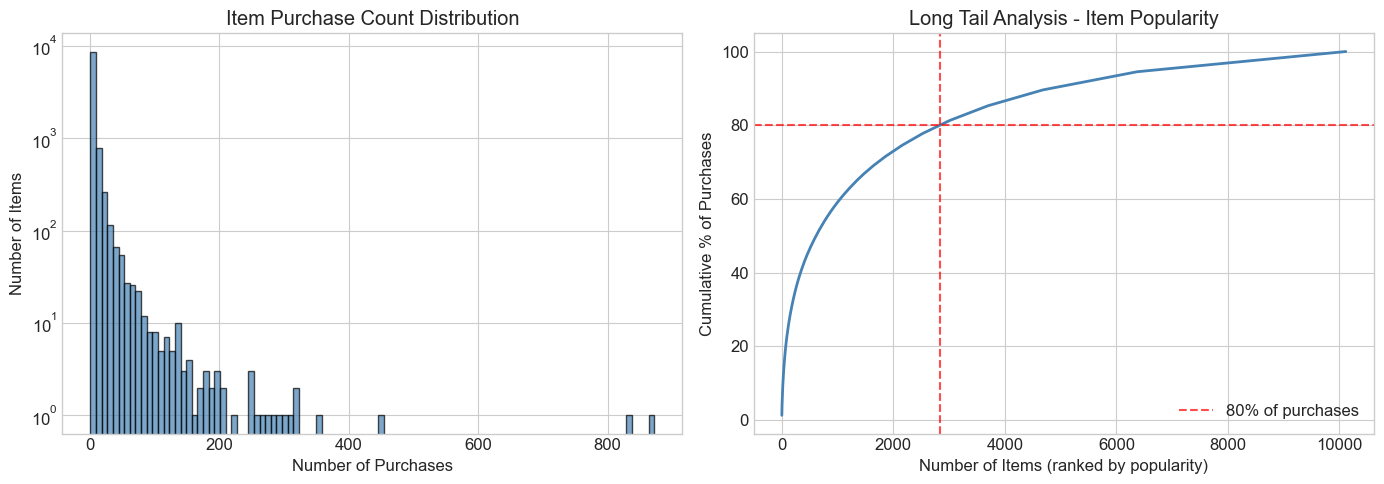

In [44]:
# Long-tail distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Purchase count distribution (log scale)
item_counts = loyal_item_popularity['purchase_count'].values
axes[0].hist(item_counts, bins=100, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Number of Purchases')
axes[0].set_ylabel('Number of Items')
axes[0].set_title('Item Purchase Count Distribution')
axes[0].set_yscale('log')

# Cumulative distribution
sorted_counts = np.sort(item_counts)[::-1]
cumsum = np.cumsum(sorted_counts) / np.sum(sorted_counts)
axes[1].plot(range(len(cumsum)), cumsum * 100, color='steelblue', linewidth=2)
axes[1].axhline(y=80, color='red', linestyle='--', alpha=0.7, label='80% of purchases')
axes[1].axvline(x=np.searchsorted(cumsum, 0.8), color='red', linestyle='--', alpha=0.7)
axes[1].set_xlabel('Number of Items (ranked by popularity)')
axes[1].set_ylabel('Cumulative % of Purchases')
axes[1].set_title('Long Tail Analysis - Item Popularity')
axes[1].legend()

items_for_80 = np.searchsorted(cumsum, 0.8)
print(f'{items_for_80} items ({items_for_80/len(item_counts)*100:.1f}%) account for 80% of purchases')

plt.tight_layout()
plt.show()

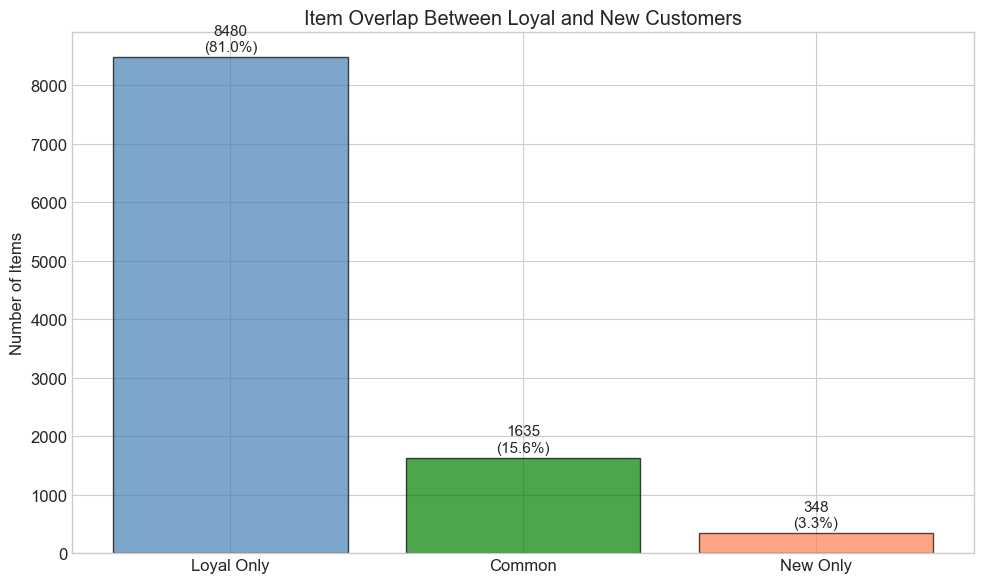

Total unique items in loyal: 10115
Total unique items in new: 1983
Common items: 1635 (82.5% of new customer items)


In [45]:
# Item overlap analysis
loyal_items = set(loyal_df['item_id'].unique())
new_items = set(new_df['item_id'].unique())

common_items = loyal_items.intersection(new_items)
loyal_only = loyal_items - new_items
new_only = new_items - loyal_items

# Venn diagram data
fig, ax = plt.subplots(figsize=(10, 6))

from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

# Simple representation
categories = ['Loyal Only', 'Common', 'New Only']
values = [len(loyal_only), len(common_items), len(new_only)]
colors = ['steelblue', 'green', 'coral']

bars = ax.bar(categories, values, color=colors, alpha=0.7, edgecolor='black')
ax.set_ylabel('Number of Items')
ax.set_title('Item Overlap Between Loyal and New Customers')

for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
            f'{val}\n({val/len(loyal_items.union(new_items))*100:.1f}%)', 
            ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

print(f'Total unique items in loyal: {len(loyal_items)}')
print(f'Total unique items in new: {len(new_items)}')
print(f'Common items: {len(common_items)} ({len(common_items)/len(new_items)*100:.1f}% of new customer items)')

## 4. Transaction Patterns

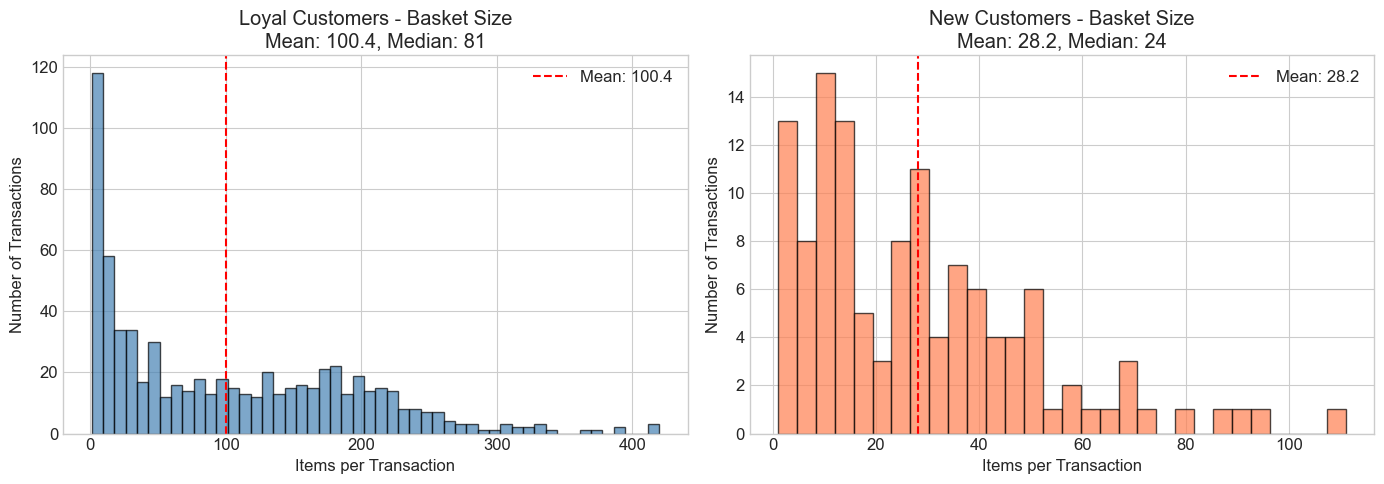

In [46]:
# Basket analysis - items per transaction
loyal_basket_size = loyal_df.groupby('ticket_number').size()
new_basket_size = new_df.groupby('ticket_number').size()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(loyal_basket_size, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Items per Transaction')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title(f'Loyal Customers - Basket Size\nMean: {loyal_basket_size.mean():.1f}, Median: {loyal_basket_size.median():.0f}')
axes[0].axvline(x=loyal_basket_size.mean(), color='red', linestyle='--', label=f'Mean: {loyal_basket_size.mean():.1f}')
axes[0].legend()

axes[1].hist(new_basket_size, bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Items per Transaction')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_title(f'New Customers - Basket Size\nMean: {new_basket_size.mean():.1f}, Median: {new_basket_size.median():.0f}')
axes[1].axvline(x=new_basket_size.mean(), color='red', linestyle='--', label=f'Mean: {new_basket_size.mean():.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

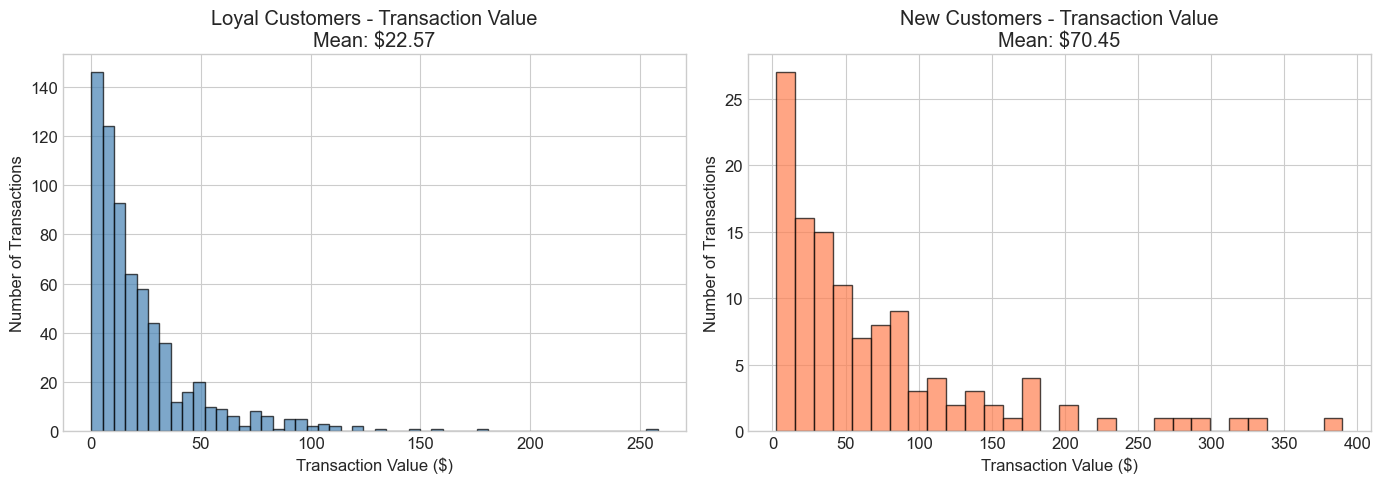

In [47]:
# Transaction value distribution
loyal_ticket_values = loyal_df.groupby('ticket_number')['ticket_amount'].first()
new_ticket_values = new_df.groupby('ticket_number')['ticket_amount'].first()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(loyal_ticket_values, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Transaction Value ($)')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title(f'Loyal Customers - Transaction Value\nMean: ${loyal_ticket_values.mean():.2f}')

axes[1].hist(new_ticket_values, bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Transaction Value ($)')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_title(f'New Customers - Transaction Value\nMean: ${new_ticket_values.mean():.2f}')

plt.tight_layout()
plt.show()

## 5. Price Distribution Analysis

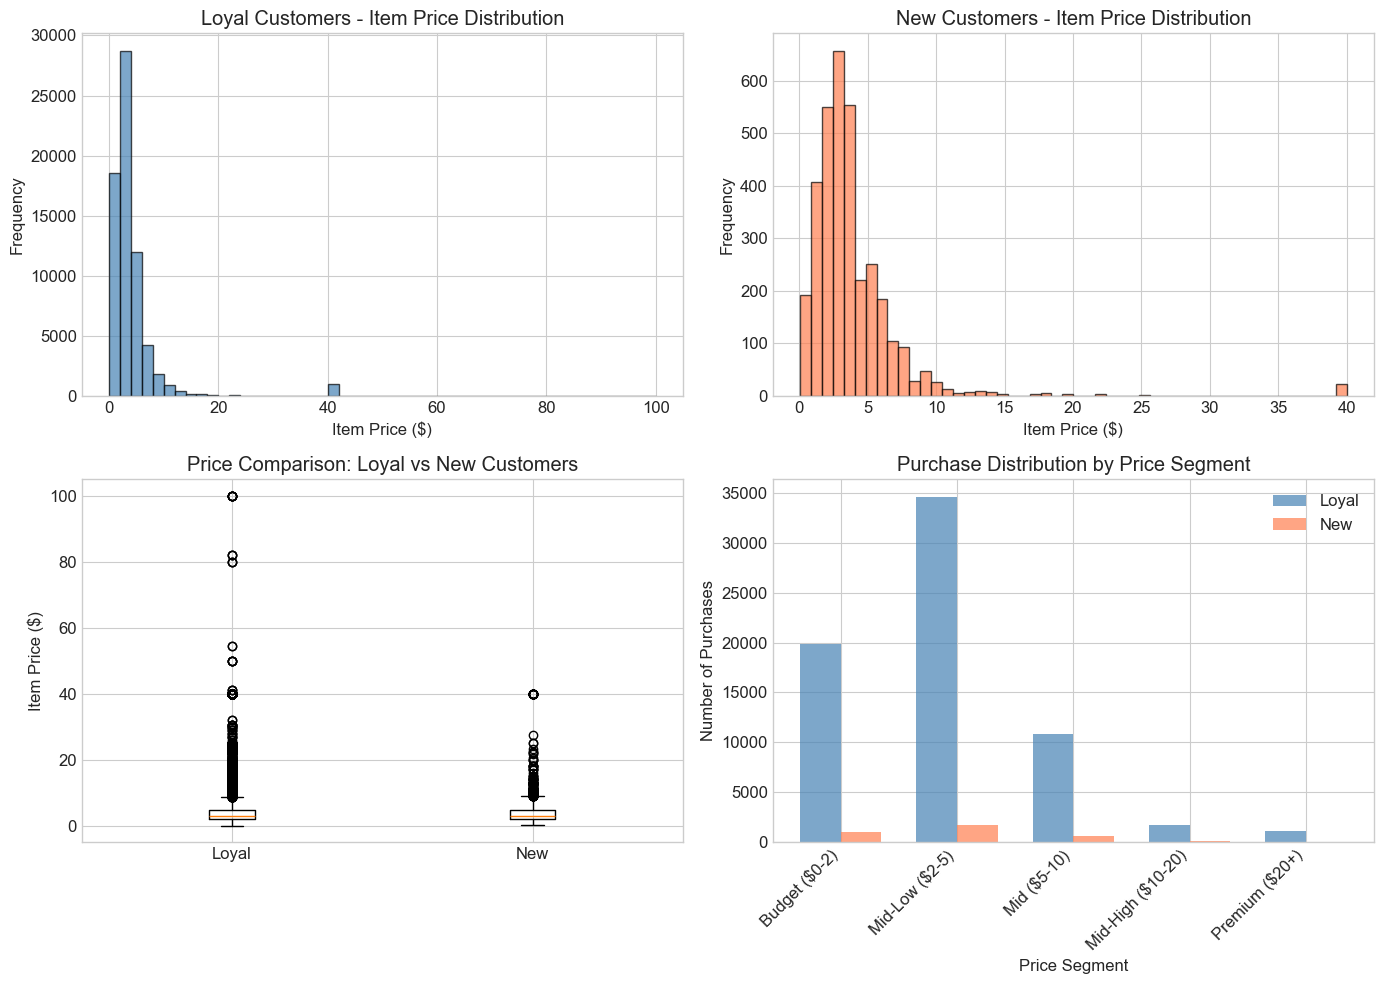

In [48]:
# Price distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loyal customers price histogram
axes[0, 0].hist(loyal_df['item_price'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Item Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Loyal Customers - Item Price Distribution')

# New customers price histogram
axes[0, 1].hist(new_df['item_price'], bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Item Price ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('New Customers - Item Price Distribution')

# Box plots
axes[1, 0].boxplot([loyal_df['item_price'], new_df['item_price']], labels=['Loyal', 'New'])
axes[1, 0].set_ylabel('Item Price ($)')
axes[1, 0].set_title('Price Comparison: Loyal vs New Customers')

# Price segments
def get_price_segment(price):
    if price <= 2:
        return 'Budget ($0-2)'
    elif price <= 5:
        return 'Mid-Low ($2-5)'
    elif price <= 10:
        return 'Mid ($5-10)'
    elif price <= 20:
        return 'Mid-High ($10-20)'
    else:
        return 'Premium ($20+)'

loyal_segments = loyal_df['item_price'].apply(get_price_segment).value_counts()
new_segments = new_df['item_price'].apply(get_price_segment).value_counts()

segments_order = ['Budget ($0-2)', 'Mid-Low ($2-5)', 'Mid ($5-10)', 'Mid-High ($10-20)', 'Premium ($20+)']
x = np.arange(len(segments_order))
width = 0.35

loyal_vals = [loyal_segments.get(s, 0) for s in segments_order]
new_vals = [new_segments.get(s, 0) for s in segments_order]

axes[1, 1].bar(x - width/2, loyal_vals, width, label='Loyal', color='steelblue', alpha=0.7)
axes[1, 1].bar(x + width/2, new_vals, width, label='New', color='coral', alpha=0.7)
axes[1, 1].set_xlabel('Price Segment')
axes[1, 1].set_ylabel('Number of Purchases')
axes[1, 1].set_title('Purchase Distribution by Price Segment')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(segments_order, rotation=45, ha='right')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [49]:
# Price statistics by segment
print('Price Statistics:')
print('\nLoyal Customers:')
print(loyal_df['item_price'].describe())
print('\nNew Customers:')
print(new_df['item_price'].describe())

Price Statistics:

Loyal Customers:
count    68190.000000
mean         4.192826
std          5.265579
min          0.000000
25%          1.990000
50%          2.990000
75%          4.690000
max        100.000000
Name: item_price, dtype: float64

New Customers:
count    3411.000000
mean        3.916942
std         3.931387
min         0.050000
25%         1.990000
50%         3.000000
75%         4.790000
max        40.000000
Name: item_price, dtype: float64


## 6. Co-purchase Analysis

In [50]:
# Find frequently co-purchased items (items bought in the same transaction)
def get_copurchase_pairs(df, sample_size=10000):
    """Get co-purchase pairs from transactions"""
    copurchase_counts = Counter()
    
    # Group by ticket to get baskets
    baskets = df.groupby('ticket_number')['item_id'].apply(list)
    
    for basket in baskets:
        if len(basket) > 1 and len(basket) <= 50:  # Skip very large baskets
            # Get all pairs
            for pair in combinations(sorted(set(basket)), 2):
                copurchase_counts[pair] += 1
    
    return copurchase_counts

print('Analyzing co-purchase patterns for loyal customers...')
loyal_copurchases = get_copurchase_pairs(loyal_df)

print(f'\nTop 20 Co-purchased Item Pairs:')
for (item1, item2), count in loyal_copurchases.most_common(20):
    print(f'  {item1} + {item2}: {count} times')

Analyzing co-purchase patterns for loyal customers...

Top 20 Co-purchased Item Pairs:
  4011 + 7206000117: 30 times
  4011 + 7206000717: 21 times
  7189903720 + 7206000117: 19 times
  7206000117 + 7800008240: 18 times
  7206000117 + 7206000717: 17 times
  20000500000 + 4011: 16 times
  4011 + 9147504189: 15 times
  4011 + 7800008240: 15 times
  4011 + 7189903720: 14 times
  2754100123 + 4011: 13 times
  7206000117 + 9147504189: 12 times
  20000500000 + 7206000117: 12 times
  4011 + 7003837286: 12 times
  4011 + 7189983548: 12 times
  20001100000 + 4011: 11 times
  4011 + 7003837280: 11 times
  7206000717 + 7800008240: 11 times
  7003837286 + 7206000117: 10 times
  7189983548 + 7206000117: 10 times
  4011 + 7100760405: 10 times


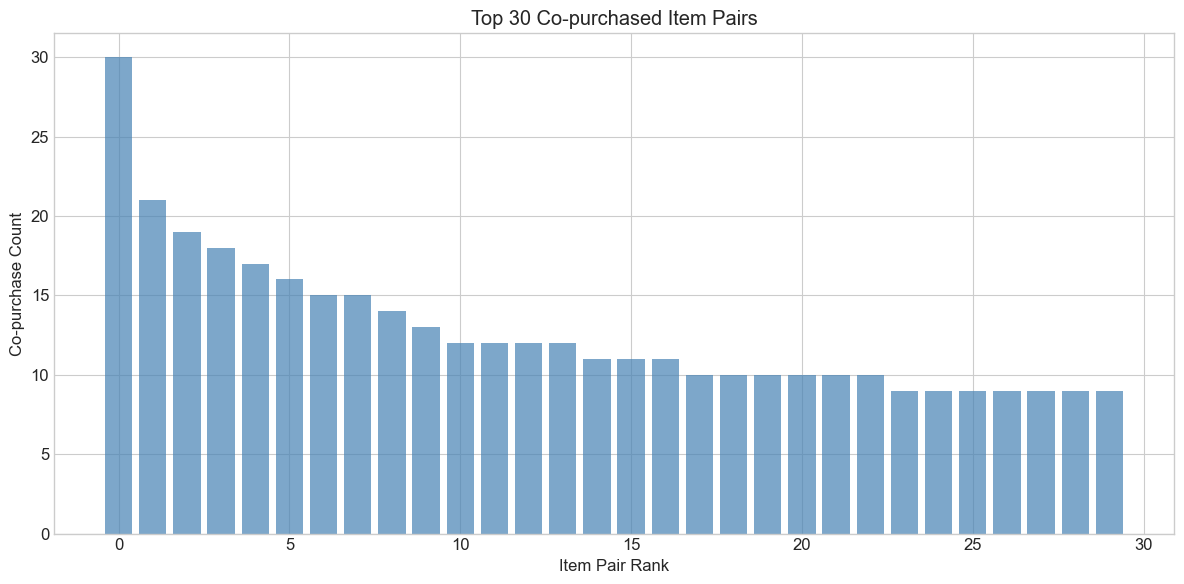

In [51]:
# Visualize co-purchase network (top pairs)
top_pairs = loyal_copurchases.most_common(30)
pair_counts = [count for _, count in top_pairs]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(len(pair_counts)), pair_counts, color='steelblue', alpha=0.7)
ax.set_xlabel('Item Pair Rank')
ax.set_ylabel('Co-purchase Count')
ax.set_title('Top 30 Co-purchased Item Pairs')
plt.tight_layout()
plt.show()

## 7. Temporal Analysis

In [52]:
# Extract time features
loyal_df['date'] = loyal_df['ticket_datetime'].dt.date
loyal_df['hour'] = loyal_df['ticket_datetime'].dt.hour
loyal_df['day_of_week'] = loyal_df['ticket_datetime'].dt.day_name()
loyal_df['month'] = loyal_df['ticket_datetime'].dt.to_period('M')

new_df['date'] = new_df['ticket_datetime'].dt.date
new_df['hour'] = new_df['ticket_datetime'].dt.hour
new_df['day_of_week'] = new_df['ticket_datetime'].dt.day_name()
new_df['month'] = new_df['ticket_datetime'].dt.to_period('M')

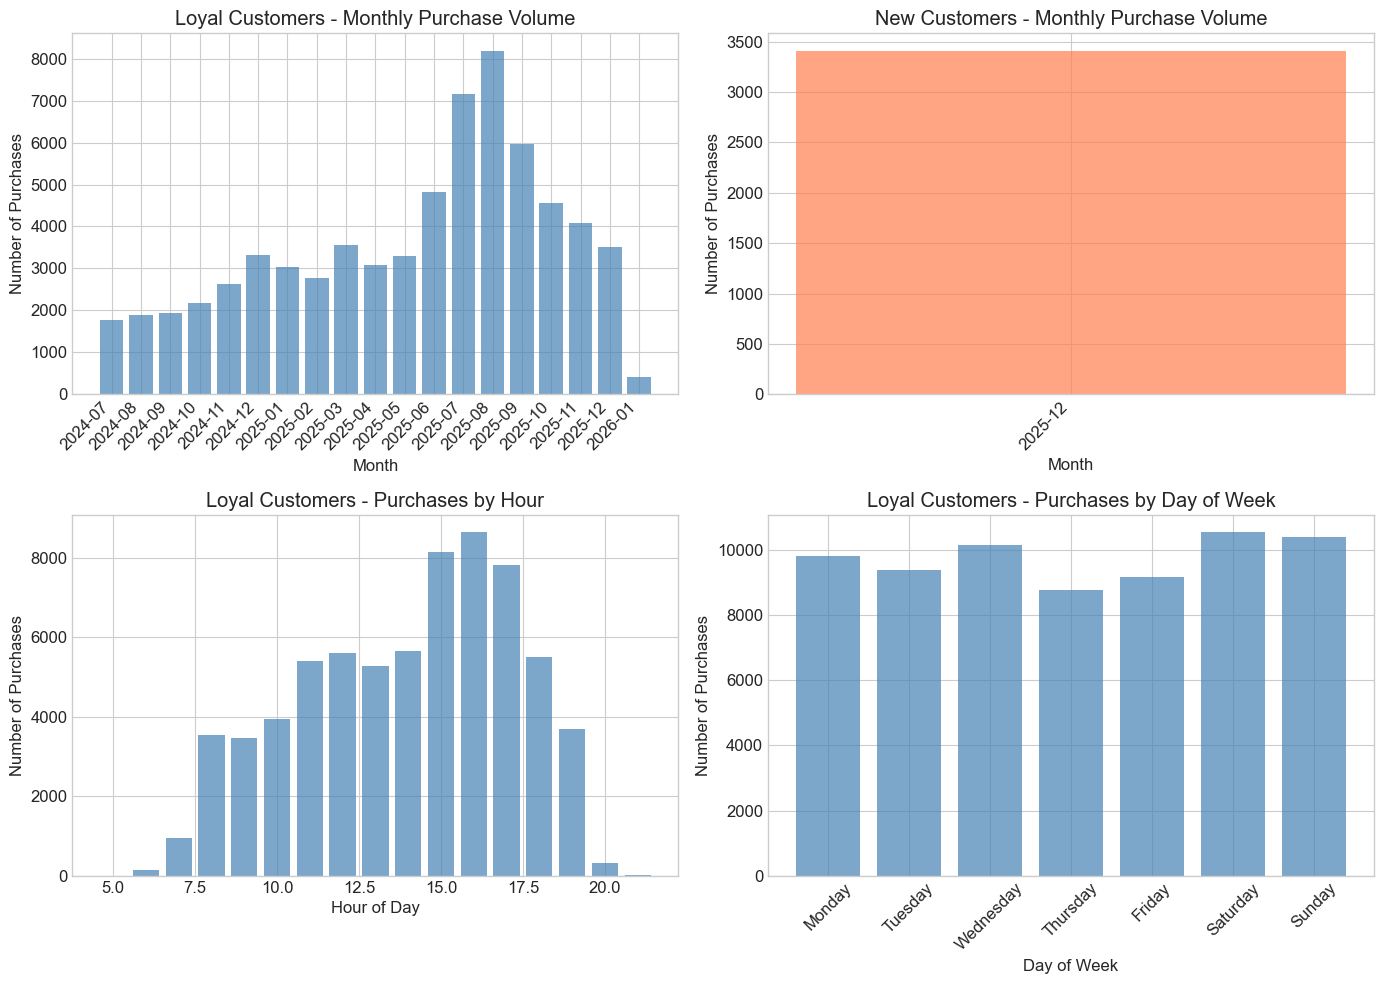

In [53]:
# Purchases by month
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Monthly purchases - Loyal
loyal_monthly = loyal_df.groupby('month').size()
axes[0, 0].bar(range(len(loyal_monthly)), loyal_monthly.values, color='steelblue', alpha=0.7)
axes[0, 0].set_xticks(range(len(loyal_monthly)))
axes[0, 0].set_xticklabels([str(m) for m in loyal_monthly.index], rotation=45, ha='right')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Purchases')
axes[0, 0].set_title('Loyal Customers - Monthly Purchase Volume')

# Monthly purchases - New
new_monthly = new_df.groupby('month').size()
axes[0, 1].bar(range(len(new_monthly)), new_monthly.values, color='coral', alpha=0.7)
axes[0, 1].set_xticks(range(len(new_monthly)))
axes[0, 1].set_xticklabels([str(m) for m in new_monthly.index], rotation=45, ha='right')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Purchases')
axes[0, 1].set_title('New Customers - Monthly Purchase Volume')

# Hour of day - Loyal
loyal_hourly = loyal_df.groupby('hour').size()
axes[1, 0].bar(loyal_hourly.index, loyal_hourly.values, color='steelblue', alpha=0.7)
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Number of Purchases')
axes[1, 0].set_title('Loyal Customers - Purchases by Hour')

# Day of week - Loyal
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
loyal_daily = loyal_df.groupby('day_of_week').size().reindex(day_order)
axes[1, 1].bar(day_order, loyal_daily.values, color='steelblue', alpha=0.7)
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Number of Purchases')
axes[1, 1].set_title('Loyal Customers - Purchases by Day of Week')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Sparsity Analysis

In [54]:
# User-Item Matrix Sparsity Analysis
def calculate_sparsity(df, user_col='user_id', item_col='item_id'):
    n_users = df[user_col].nunique()
    n_items = df[item_col].nunique()
    n_interactions = df.groupby([user_col, item_col]).size().shape[0]
    
    total_possible = n_users * n_items
    sparsity = 1 - (n_interactions / total_possible)
    
    return {
        'n_users': n_users,
        'n_items': n_items,
        'n_interactions': n_interactions,
        'total_possible': total_possible,
        'sparsity': sparsity,
        'density': 1 - sparsity
    }

loyal_sparsity = calculate_sparsity(loyal_df)
new_sparsity = calculate_sparsity(new_df)

print('=== SPARSITY ANALYSIS ===')
print('\nLoyal Customers:')
for key, value in loyal_sparsity.items():
    if isinstance(value, float):
        print(f'  {key}: {value:.6f} ({value*100:.4f}%)')
    else:
        print(f'  {key}: {value:,}')

print('\nNew Customers:')
for key, value in new_sparsity.items():
    if isinstance(value, float):
        print(f'  {key}: {value:.6f} ({value*100:.4f}%)')
    else:
        print(f'  {key}: {value:,}')

=== SPARSITY ANALYSIS ===

Loyal Customers:
  n_users: 70
  n_items: 10,115
  n_interactions: 31,286
  total_possible: 708,050
  sparsity: 0.955814 (95.5814%)
  density: 0.044186 (4.4186%)

New Customers:
  n_users: 50
  n_items: 1,983
  n_interactions: 3,095
  total_possible: 99,150
  sparsity: 0.968785 (96.8785%)
  density: 0.031215 (3.1215%)


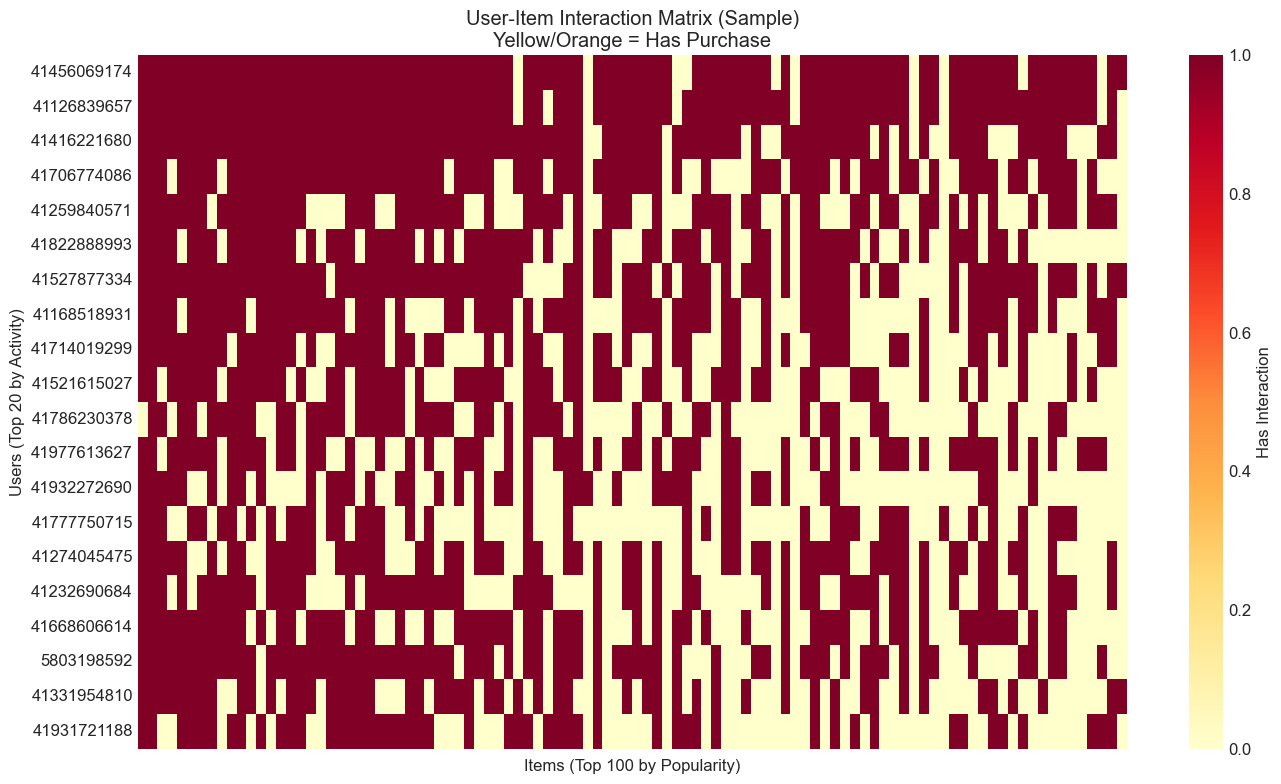

In [55]:
# Visualize user-item interaction matrix (sample)
# Create interaction matrix for loyal customers (sampled for visualization)
loyal_matrix = loyal_df.groupby(['user_id', 'item_id']).size().unstack(fill_value=0)

# Sample for visualization (top users and top items)
top_users = loyal_df.groupby('user_id').size().nlargest(20).index
top_items = loyal_df.groupby('item_id').size().nlargest(100).index

sample_matrix = loyal_matrix.loc[top_users, top_items]

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(sample_matrix > 0, cmap='YlOrRd', cbar_kws={'label': 'Has Interaction'}, ax=ax)
ax.set_xlabel('Items (Top 100 by Popularity)')
ax.set_ylabel('Users (Top 20 by Activity)')
ax.set_title('User-Item Interaction Matrix (Sample)\nYellow/Orange = Has Purchase')
ax.set_xticklabels([])
plt.tight_layout()
plt.show()

## 9. Recommendations for Model Selection

In [56]:
# Summary and Recommendations
print('=' * 80)
print('DATA ANALYSIS SUMMARY & MODEL RECOMMENDATIONS')
print('=' * 80)

print('\n1. DATA CHARACTERISTICS:')
print(f'   - Loyal Customers: {loyal_df["user_id"].nunique()} users, {loyal_df["item_id"].nunique()} items')
print(f'   - New Customers: {new_df["user_id"].nunique()} users, {new_df["item_id"].nunique()} items')
print(f'   - Item Overlap: {len(common_items)} items ({len(common_items)/len(new_items)*100:.1f}% of new customer items)')
print(f'   - Loyal Sparsity: {loyal_sparsity["sparsity"]*100:.2f}%')
print(f'   - New Sparsity: {new_sparsity["sparsity"]*100:.2f}%')

print('\n2. KEY INSIGHTS:')
print('   - Long-tail distribution: Few items account for most purchases')
print('   - High user engagement: Loyal users have substantial history (avg 1000+ items)')
print('   - Strong co-purchase patterns: Items frequently bought together')
print('   - Price sensitivity: Most items in $2-5 range')

print('\n3. RECOMMENDED MODELS:')
print('   ')
print('   FOR LOYAL CUSTOMERS:')
print('   - Primary: Item-Item Collaborative Filtering (proven, scalable)')
print('   - Secondary: Matrix Factorization (ALS for implicit feedback)')
print('   - Rationale: Rich user history enables personalized CF')
print('   ')
print('   FOR NEW CUSTOMERS (Cold Start):')
print('   - Popularity-based: Trending/bestselling items')
print('   - Price-segment matching: Recommend within user\'s price range')
print('   - Item similarity: If any interaction, use similar items')
print('   - Hybrid: Combine above for diversity')

print('\n4. TECHNICAL CONSIDERATIONS:')
print('   - Precompute item similarities offline for fast serving')
print('   - Use time-weighted interactions (recent = more relevant)')
print('   - Cache popular item lists for cold-start fallback')
print('   - Target latency: <100ms for real-time recommendations')

DATA ANALYSIS SUMMARY & MODEL RECOMMENDATIONS

1. DATA CHARACTERISTICS:
   - Loyal Customers: 70 users, 10115 items
   - New Customers: 50 users, 1983 items
   - Item Overlap: 1635 items (82.5% of new customer items)
   - Loyal Sparsity: 95.58%
   - New Sparsity: 96.88%

2. KEY INSIGHTS:
   - Long-tail distribution: Few items account for most purchases
   - High user engagement: Loyal users have substantial history (avg 1000+ items)
   - Strong co-purchase patterns: Items frequently bought together
   - Price sensitivity: Most items in $2-5 range

3. RECOMMENDED MODELS:
   
   FOR LOYAL CUSTOMERS:
   - Primary: Item-Item Collaborative Filtering (proven, scalable)
   - Secondary: Matrix Factorization (ALS for implicit feedback)
   - Rationale: Rich user history enables personalized CF
   
   FOR NEW CUSTOMERS (Cold Start):
   - Popularity-based: Trending/bestselling items
   - Price-segment matching: Recommend within user's price range
   - Item similarity: If any interaction, use simil

In [57]:
# Save processed data for model training
print('\nSaving processed data for model training...')

# Combine datasets with user type flag
loyal_df['user_type'] = 'loyal'
new_df['user_type'] = 'new'

# Save to CSV
loyal_df.to_csv('../data/loyal_customers_processed.csv', index=False)
new_df.to_csv('../data/new_customers_processed.csv', index=False)

# Save item popularity for cold-start
loyal_item_popularity.to_csv('../data/item_popularity.csv')

print('Data saved successfully!')
print('  - ../data/loyal_customers_processed.csv')
print('  - ../data/new_customers_processed.csv')
print('  - ../data/item_popularity.csv')


Saving processed data for model training...
Data saved successfully!
  - ../data/loyal_customers_processed.csv
  - ../data/new_customers_processed.csv
  - ../data/item_popularity.csv


## 10. Item Price Variation Over Time

This section analyzes whether item prices remain fixed or vary over time, which is crucial for:
- Understanding if promotional pricing exists
- Identifying seasonal price patterns
- Enabling price-aware recommendations

In [58]:
# Calculate price variation statistics for each item
def analyze_price_variation(df, min_occurrences=5):
    """
    Analyze price variations for items that appear multiple times.
    Only consider items with at least min_occurrences purchases.
    """
    item_price_stats = df.groupby('item_id')['item_price'].agg([
        'count', 'min', 'max', 'mean', 'std'
    ]).reset_index()
    
    item_price_stats.columns = ['item_id', 'purchase_count', 'min_price', 
                                 'max_price', 'mean_price', 'std_price']
    
    # Filter to items with sufficient occurrences
    item_price_stats = item_price_stats[item_price_stats['purchase_count'] >= min_occurrences]
    
    # Calculate price range and coefficient of variation
    item_price_stats['price_range'] = item_price_stats['max_price'] - item_price_stats['min_price']
    item_price_stats['price_cv'] = (item_price_stats['std_price'] / 
                                     item_price_stats['mean_price']).fillna(0)
    
    # Classify items as fixed or variable price
    item_price_stats['price_type'] = item_price_stats.apply(
        lambda x: 'Fixed' if x['price_range'] == 0 else 
                  ('Low Variation' if x['price_cv'] < 0.1 else 'Variable'),
        axis=1
    )
    
    return item_price_stats.sort_values('purchase_count', ascending=False)

# Analyze for loyal customers (they have longer time span)
loyal_price_variation = analyze_price_variation(loyal_df, min_occurrences=5)

print('=== ITEM PRICE VARIATION ANALYSIS (Loyal Customers) ===')
print(f'\nTotal items analyzed (5+ purchases): {len(loyal_price_variation)}')
print(f'\nPrice Type Distribution:')
print(loyal_price_variation['price_type'].value_counts())
print(f'\nPercentage breakdown:')
print((loyal_price_variation['price_type'].value_counts() / len(loyal_price_variation) * 100).round(2))

print('\n\nTop 20 Items with HIGHEST Price Variation:')
display(loyal_price_variation.nlargest(20, 'price_cv')[
    ['item_id', 'purchase_count', 'min_price', 'max_price', 'mean_price', 'std_price', 'price_cv']
].round(2))

=== ITEM PRICE VARIATION ANALYSIS (Loyal Customers) ===

Total items analyzed (5+ purchases): 2993

Price Type Distribution:
price_type
Variable         1555
Low Variation    1007
Fixed             431
Name: count, dtype: int64

Percentage breakdown:
price_type
Variable         51.95
Low Variation    33.65
Fixed            14.40
Name: count, dtype: float64


Top 20 Items with HIGHEST Price Variation:


,item_id,purchase_count,min_price,max_price,mean_price,std_price,price_cv
1027,20042000000,8,1.89,40.0,6.72,13.45,2.00
1021,20040900000,18,1.99,40.0,4.44,8.88,2.00
1035,20045700000,8,1.99,40.0,6.74,13.44,1.99
1148,20070100000,10,1.99,40.0,6.09,11.92,1.96
1012,20036300000,23,1.49,40.0,5.60,10.87,1.94
1203,20092800000,14,0.40,40.0,7.31,13.86,1.90
1018,20040600000,15,1.99,40.0,7.17,13.33,1.86
986,20031600000,10,1.59,40.0,6.37,11.83,1.86
1013,20040000000,19,1.89,40.0,7.96,14.25,1.79
1003,20035000000,14,1.99,40.0,5.60,9.91,1.77


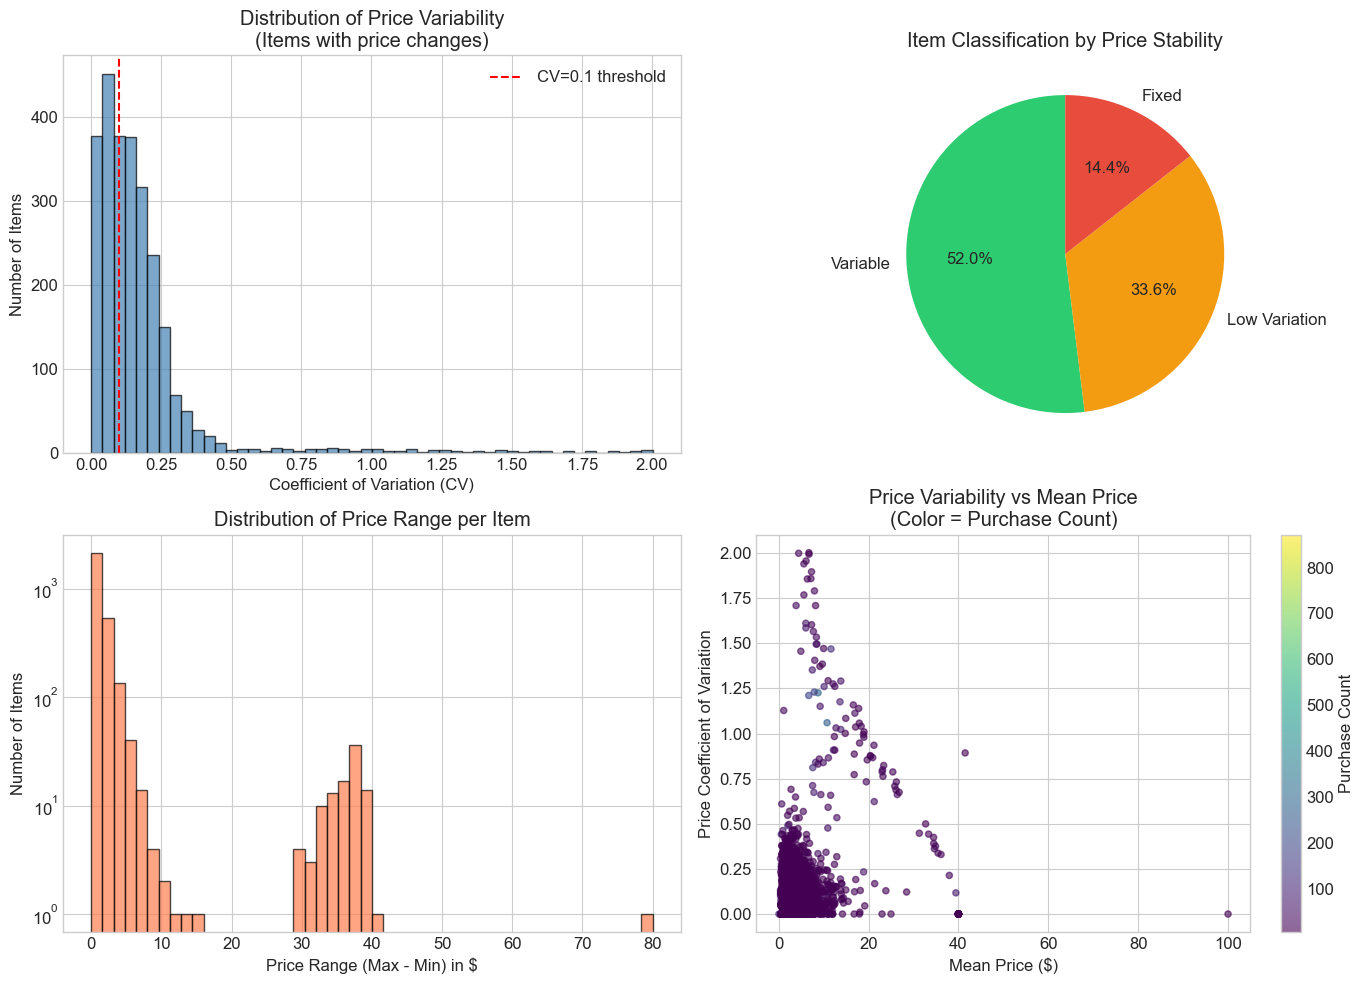

In [59]:
# Visualize price variation patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of price variation (coefficient of variation)
ax1 = axes[0, 0]
variable_items = loyal_price_variation[loyal_price_variation['price_type'] != 'Fixed']
ax1.hist(variable_items['price_cv'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Coefficient of Variation (CV)')
ax1.set_ylabel('Number of Items')
ax1.set_title('Distribution of Price Variability\n(Items with price changes)')
ax1.axvline(x=0.1, color='red', linestyle='--', label='CV=0.1 threshold')
ax1.legend()

# 2. Price type pie chart
ax2 = axes[0, 1]
price_type_counts = loyal_price_variation['price_type'].value_counts()
colors = ['#2ecc71', '#f39c12', '#e74c3c']
ax2.pie(price_type_counts.values, labels=price_type_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Item Classification by Price Stability')

# 3. Price range distribution
ax3 = axes[1, 0]
ax3.hist(loyal_price_variation['price_range'], bins=50, color='coral', alpha=0.7, edgecolor='black')
ax3.set_xlabel('Price Range (Max - Min) in $')
ax3.set_ylabel('Number of Items')
ax3.set_title('Distribution of Price Range per Item')
ax3.set_yscale('log')

# 4. Scatter plot: Mean price vs Price CV
ax4 = axes[1, 1]
scatter = ax4.scatter(loyal_price_variation['mean_price'], 
                       loyal_price_variation['price_cv'],
                       c=loyal_price_variation['purchase_count'],
                       cmap='viridis', alpha=0.6, s=20)
ax4.set_xlabel('Mean Price ($)')
ax4.set_ylabel('Price Coefficient of Variation')
ax4.set_title('Price Variability vs Mean Price\n(Color = Purchase Count)')
plt.colorbar(scatter, ax=ax4, label='Purchase Count')

plt.tight_layout()
plt.show()

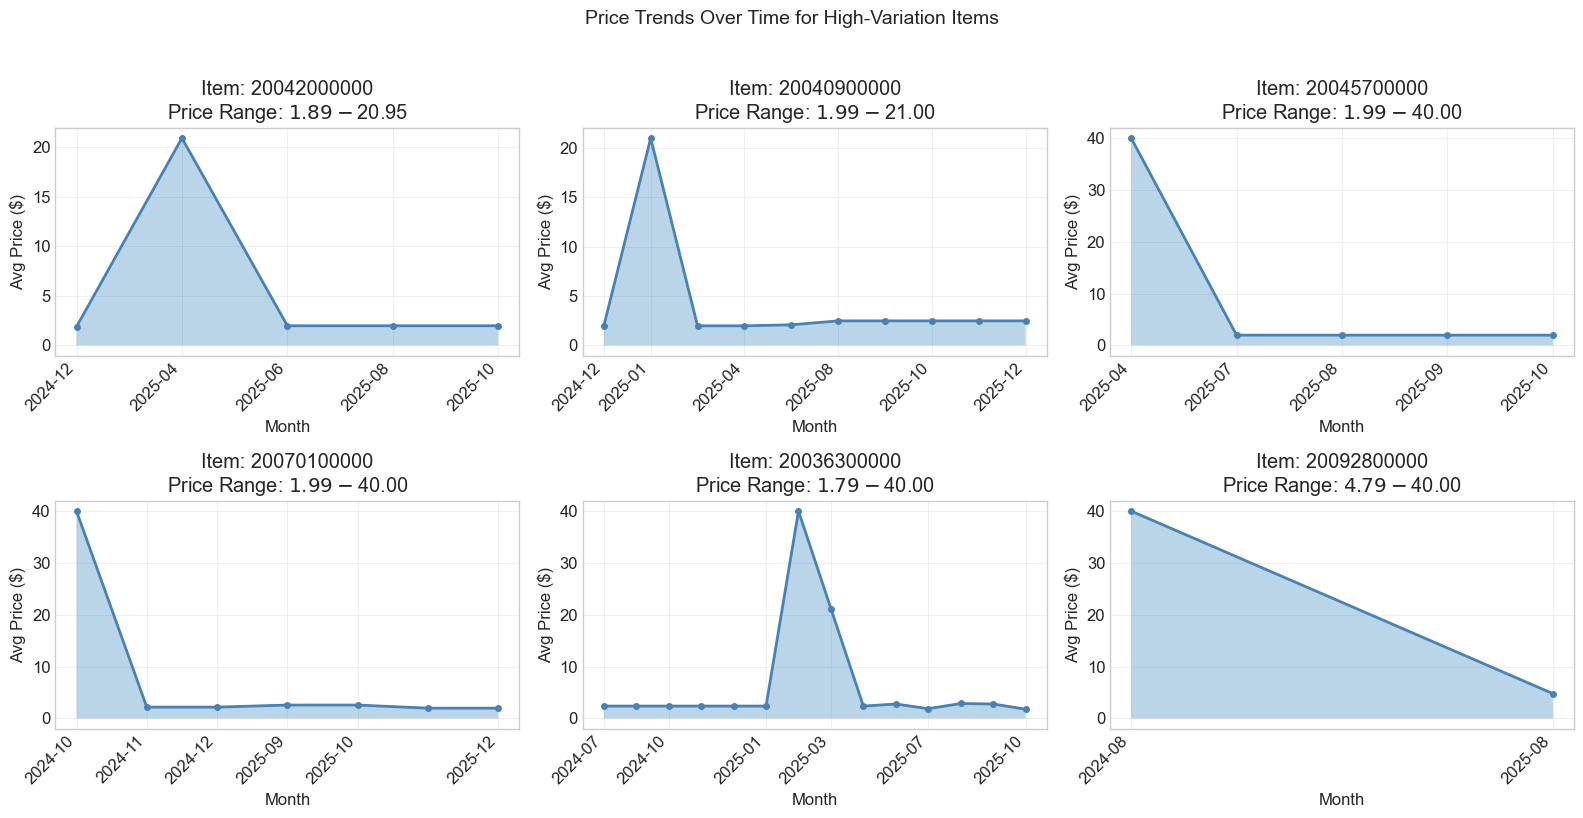

In [60]:
# Analyze price trends over time for high-variation items
def analyze_price_time_series(df, price_variation_df, top_n=6):
    """Analyze monthly price trends for items with highest variation."""
    
    # Get items with highest price variation
    high_var_items = price_variation_df.nlargest(top_n, 'price_cv')['item_id'].tolist()
    
    # Filter data for these items
    subset = df[df['item_id'].isin(high_var_items)].copy()
    subset['year_month'] = subset['ticket_datetime'].dt.to_period('M')
    
    # Calculate monthly average price per item
    monthly_prices = subset.groupby(['item_id', 'year_month'])['item_price'].mean().unstack(level=0)
    
    return monthly_prices, high_var_items

monthly_prices, high_var_items = analyze_price_time_series(loyal_df, loyal_price_variation, top_n=6)

# Plot time series
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for idx, item_id in enumerate(high_var_items[:6]):
    if item_id in monthly_prices.columns:
        ax = axes[idx]
        prices = monthly_prices[item_id].dropna()
        ax.plot(range(len(prices)), prices.values, marker='o', linewidth=2, markersize=4, color='steelblue')
        ax.fill_between(range(len(prices)), prices.values, alpha=0.3)
        ax.set_xlabel('Month')
        ax.set_ylabel('Avg Price ($)')
        ax.set_title(f'Item: {item_id}\nPrice Range: ${prices.min():.2f} - ${prices.max():.2f}')
        
        # Show fewer x-tick labels
        n_ticks = min(6, len(prices))
        tick_positions = np.linspace(0, len(prices)-1, n_ticks, dtype=int)
        ax.set_xticks(tick_positions)
        ax.set_xticklabels([str(prices.index[i]) for i in tick_positions], rotation=45, ha='right')
        ax.grid(True, alpha=0.3)

plt.suptitle('Price Trends Over Time for High-Variation Items', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

=== MONTHLY PRICE PERIOD ANALYSIS ===

Overall Average Price: $4.27 (std: $0.29)

Low Price Period Threshold: < $4.13
High Price Period Threshold: > $4.42

Monthly Price Periods:


,year_month,avg_price,median_price,std_price,num_transactions,price_period
0,2024-07,4.90,3.18,7.17,255,High
1,2024-08,4.51,2.99,6.27,252,High
2,2024-09,4.40,3.00,5.98,279,Normal
3,2024-10,4.56,2.99,6.87,293,High
4,2024-11,4.48,2.99,6.44,305,High
5,2024-12,4.81,2.99,7.19,346,High
6,2025-01,4.26,3.00,5.78,328,Normal
7,2025-02,4.43,2.99,5.89,310,High
8,2025-03,4.37,3.00,5.73,360,Normal
9,2025-04,4.14,2.99,5.36,352,Normal


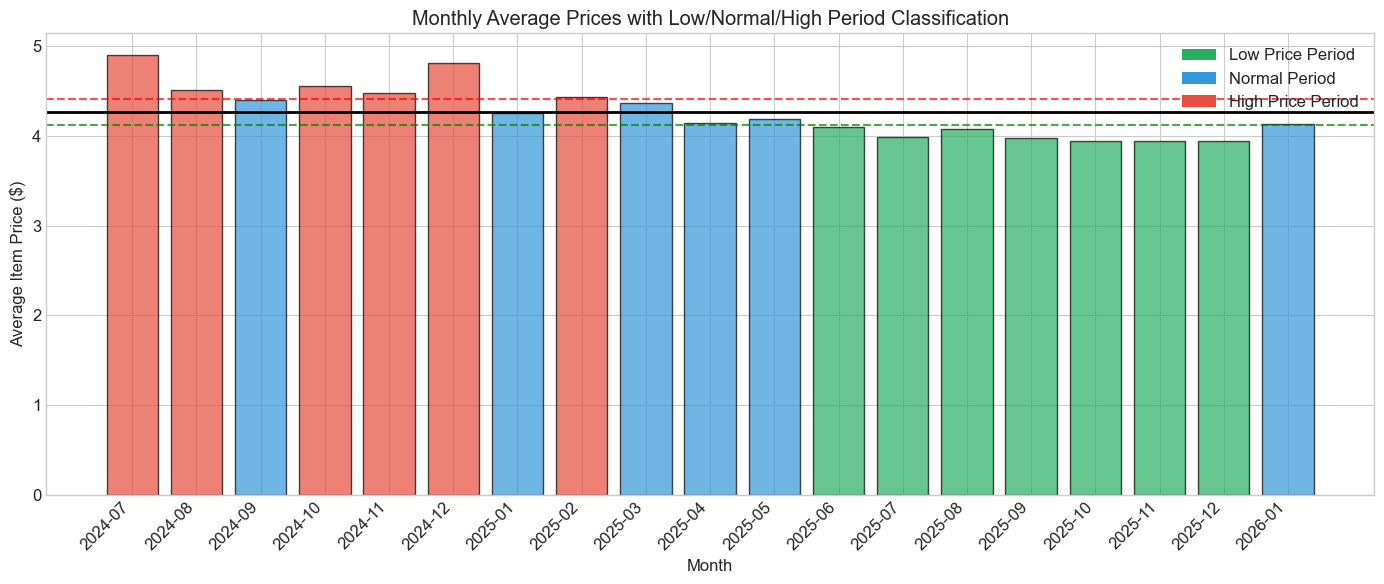

In [61]:
# Identify when prices are typically low vs high
def identify_price_periods(df):
    """Identify low/high price periods based on monthly averages."""
    
    # Calculate monthly average prices across all items
    df_temp = df.copy()
    df_temp['year_month'] = df_temp['ticket_datetime'].dt.to_period('M')
    
    monthly_avg = df_temp.groupby('year_month').agg({
        'item_price': ['mean', 'median', 'std'],
        'ticket_number': 'nunique'
    }).round(2)
    monthly_avg.columns = ['avg_price', 'median_price', 'std_price', 'num_transactions']
    monthly_avg = monthly_avg.reset_index()
    
    # Classify months as low/normal/high price periods
    overall_mean = monthly_avg['avg_price'].mean()
    overall_std = monthly_avg['avg_price'].std()
    
    monthly_avg['price_period'] = monthly_avg['avg_price'].apply(
        lambda x: 'Low' if x < overall_mean - 0.5*overall_std else 
                  ('High' if x > overall_mean + 0.5*overall_std else 'Normal')
    )
    
    return monthly_avg, overall_mean, overall_std

monthly_price_periods, mean_price, std_price = identify_price_periods(loyal_df)

print('=== MONTHLY PRICE PERIOD ANALYSIS ===')
print(f'\nOverall Average Price: ${mean_price:.2f} (std: ${std_price:.2f})')
print(f'\nLow Price Period Threshold: < ${mean_price - 0.5*std_price:.2f}')
print(f'High Price Period Threshold: > ${mean_price + 0.5*std_price:.2f}')
print('\nMonthly Price Periods:')
display(monthly_price_periods)

# Visualize
fig, ax = plt.subplots(figsize=(14, 6))
colors = {'Low': '#27ae60', 'Normal': '#3498db', 'High': '#e74c3c'}
bar_colors = [colors[p] for p in monthly_price_periods['price_period']]

bars = ax.bar(range(len(monthly_price_periods)), monthly_price_periods['avg_price'], 
              color=bar_colors, alpha=0.7, edgecolor='black')
ax.axhline(y=mean_price, color='black', linestyle='-', linewidth=2, label=f'Mean: ${mean_price:.2f}')
ax.axhline(y=mean_price - 0.5*std_price, color='green', linestyle='--', alpha=0.7, label='Low threshold')
ax.axhline(y=mean_price + 0.5*std_price, color='red', linestyle='--', alpha=0.7, label='High threshold')

ax.set_xticks(range(len(monthly_price_periods)))
ax.set_xticklabels([str(m) for m in monthly_price_periods['year_month']], rotation=45, ha='right')
ax.set_xlabel('Month')
ax.set_ylabel('Average Item Price ($)')
ax.set_title('Monthly Average Prices with Low/Normal/High Period Classification')

# Add legend for bar colors
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#27ae60', label='Low Price Period'),
                   Patch(facecolor='#3498db', label='Normal Period'),
                   Patch(facecolor='#e74c3c', label='High Price Period')]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

In [62]:
# Summary statistics for price variation analysis
print('=' * 80)
print('PRICE VARIATION SUMMARY')
print('=' * 80)

fixed_count = (loyal_price_variation['price_type'] == 'Fixed').sum()
low_var_count = (loyal_price_variation['price_type'] == 'Low Variation').sum()
variable_count = (loyal_price_variation['price_type'] == 'Variable').sum()
total = len(loyal_price_variation)

print(f'''
KEY FINDINGS:

1. Price Stability Analysis (items with 5+ purchases):
   - Fixed Price Items: {fixed_count} ({fixed_count/total*100:.1f}%)
   - Low Variation Items (CV < 0.1): {low_var_count} ({low_var_count/total*100:.1f}%)
   - Variable Price Items (CV >= 0.1): {variable_count} ({variable_count/total*100:.1f}%)

2. Price Variation Statistics:
   - Average Price CV: {loyal_price_variation['price_cv'].mean():.3f}
   - Median Price CV: {loyal_price_variation['price_cv'].median():.3f}
   - Max Price Range: ${loyal_price_variation['price_range'].max():.2f}
   - Average Price Range: ${loyal_price_variation['price_range'].mean():.2f}

3. Monthly Price Periods:
   - Low Price Months: {(monthly_price_periods['price_period'] == 'Low').sum()}
   - Normal Price Months: {(monthly_price_periods['price_period'] == 'Normal').sum()}
   - High Price Months: {(monthly_price_periods['price_period'] == 'High').sum()}

4. Implications for Recommendation System:
   - {'Majority of items have stable prices - price is reliable for recommendations' 
      if fixed_count/total > 0.5 else 'Significant price variation exists - consider time-based price awareness'}
   - Can use current prices for matching user preferences
   - {'May benefit from promotional/deal recommendations during low-price periods' 
      if variable_count/total > 0.2 else 'Limited opportunity for price-based promotions'}
''')

PRICE VARIATION SUMMARY

KEY FINDINGS:

1. Price Stability Analysis (items with 5+ purchases):
   - Fixed Price Items: 431 (14.4%)
   - Low Variation Items (CV < 0.1): 1007 (33.6%)
   - Variable Price Items (CV >= 0.1): 1555 (52.0%)

2. Price Variation Statistics:
   - Average Price CV: 0.148
   - Median Price CV: 0.106
   - Max Price Range: $80.00
   - Average Price Range: $2.31

3. Monthly Price Periods:
   - Low Price Months: 7
   - Normal Price Months: 6
   - High Price Months: 6

4. Implications for Recommendation System:
   - Significant price variation exists - consider time-based price awareness
   - Can use current prices for matching user preferences
   - May benefit from promotional/deal recommendations during low-price periods



## 11. Price Elasticity Analysis

This section investigates the relationship between item prices and purchase behavior:
- **Key Question**: Do users buy more when prices are low?
- Analyze correlation between price and units sold
- Identify price-sensitive items and user segments
- Provide insights for price-aware recommendations

In [63]:
# Analyze relationship between price and purchase volume
from scipy import stats

# Overall correlation between price and units sold
print('=== PRICE ELASTICITY ANALYSIS ===')
print('\n1. Overall Correlation (Price vs Units Sold):')

# For all transactions
correlation, p_value = stats.pearsonr(loyal_df['item_price'], loyal_df['units_sold'])
print(f'   Pearson Correlation: {correlation:.4f} (p-value: {p_value:.4e})')

# Spearman for non-linear relationships
spearman_corr, spearman_p = stats.spearmanr(loyal_df['item_price'], loyal_df['units_sold'])
print(f'   Spearman Correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4e})')

# Group by price quartiles and compare purchase volume
loyal_df['price_quartile'] = pd.qcut(loyal_df['item_price'], q=4, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'], duplicates='drop')

quartile_analysis = loyal_df.groupby('price_quartile').agg({
    'units_sold': ['mean', 'sum', 'count'],
    'item_price': ['mean', 'min', 'max']
}).round(2)

quartile_analysis.columns = ['avg_units', 'total_units', 'num_purchases', 'avg_price', 'min_price', 'max_price']
print('\n2. Purchase Volume by Price Quartile:')
display(quartile_analysis)

# Statistical test: Is there significant difference in units sold across price quartiles?
from scipy.stats import kruskal
groups = [group['units_sold'].values for name, group in loyal_df.groupby('price_quartile')]
h_stat, kruskal_p = kruskal(*groups)
print(f'\n3. Kruskal-Wallis Test (units sold across price quartiles):')
print(f'   H-statistic: {h_stat:.2f}, p-value: {kruskal_p:.4e}')
print(f'   Interpretation: {"Significant difference in units sold across price levels" if kruskal_p < 0.05 else "No significant difference"}')

=== PRICE ELASTICITY ANALYSIS ===

1. Overall Correlation (Price vs Units Sold):
   Pearson Correlation: -0.0525 (p-value: 9.2337e-43)
   Spearman Correlation: -0.1699 (p-value: 0.0000e+00)

2. Purchase Volume by Price Quartile:


,avg_units,total_units,num_purchases,avg_price,min_price,max_price
price_quartile,,,,,,
Q1 (Lowest),1.48,27397,18568,1.32,0.00,1.99
Q2,1.24,19279,15594,2.55,2.00,2.99
Q3,1.17,19820,17005,3.80,3.00,4.69
Q4 (Highest),1.15,19506,17023,9.23,4.72,100.00



3. Kruskal-Wallis Test (units sold across price quartiles):
   H-statistic: 1871.07, p-value: 0.0000e+00
   Interpretation: Significant difference in units sold across price levels


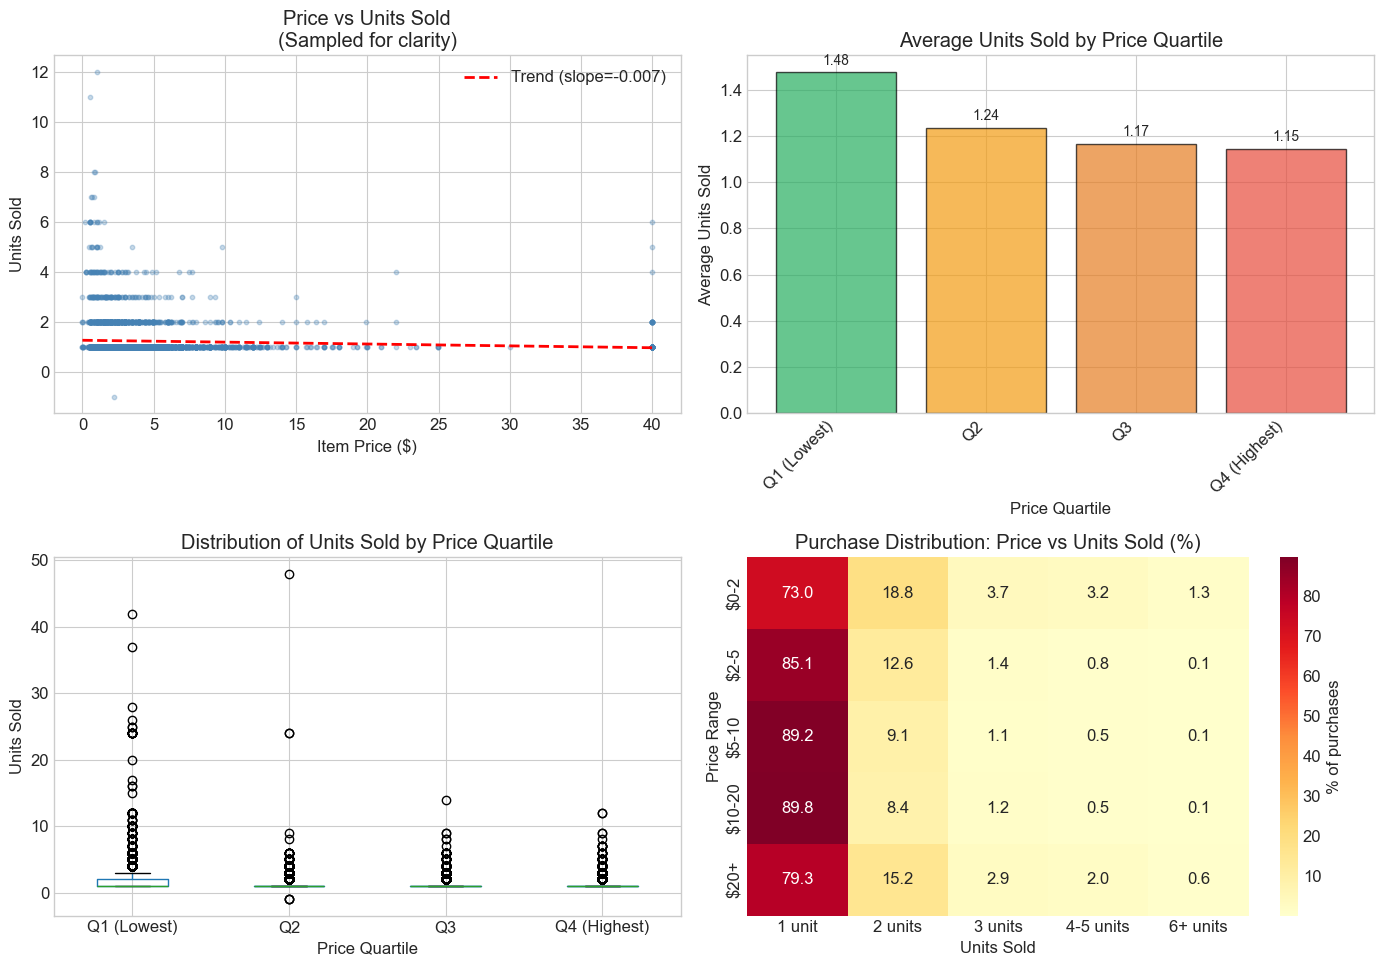

In [64]:
# Visualize price elasticity
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Scatter plot: Price vs Units Sold (sample for clarity)
ax1 = axes[0, 0]
sample = loyal_df.sample(min(5000, len(loyal_df)), random_state=42)
ax1.scatter(sample['item_price'], sample['units_sold'], alpha=0.3, s=10, c='steelblue')
# Add trend line
z = np.polyfit(sample['item_price'], sample['units_sold'], 1)
p = np.poly1d(z)
x_line = np.linspace(sample['item_price'].min(), sample['item_price'].max(), 100)
ax1.plot(x_line, p(x_line), "r--", linewidth=2, label=f'Trend (slope={z[0]:.3f})')
ax1.set_xlabel('Item Price ($)')
ax1.set_ylabel('Units Sold')
ax1.set_title('Price vs Units Sold\n(Sampled for clarity)')
ax1.legend()

# 2. Bar chart: Average units sold by price quartile
ax2 = axes[0, 1]
quartile_means = loyal_df.groupby('price_quartile')['units_sold'].mean()
colors = ['#27ae60', '#f39c12', '#e67e22', '#e74c3c']
bars = ax2.bar(range(len(quartile_means)), quartile_means.values, color=colors, alpha=0.7, edgecolor='black')
ax2.set_xticks(range(len(quartile_means)))
ax2.set_xticklabels(quartile_means.index, rotation=45, ha='right')
ax2.set_xlabel('Price Quartile')
ax2.set_ylabel('Average Units Sold')
ax2.set_title('Average Units Sold by Price Quartile')
# Add value labels
for bar, val in zip(bars, quartile_means.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{val:.2f}', 
             ha='center', va='bottom', fontsize=10)

# 3. Box plot of units sold by price quartile
ax3 = axes[1, 0]
loyal_df.boxplot(column='units_sold', by='price_quartile', ax=ax3)
ax3.set_xlabel('Price Quartile')
ax3.set_ylabel('Units Sold')
ax3.set_title('Distribution of Units Sold by Price Quartile')
plt.suptitle('')  # Remove automatic title

# 4. Heatmap: Price bins vs Units bins
ax4 = axes[1, 1]
# Create bins
loyal_df['price_bin'] = pd.cut(loyal_df['item_price'], bins=[0, 2, 5, 10, 20, 100], 
                                labels=['$0-2', '$2-5', '$5-10', '$10-20', '$20+'])
loyal_df['units_bin'] = pd.cut(loyal_df['units_sold'], bins=[0, 1, 2, 3, 5, 100], 
                                labels=['1 unit', '2 units', '3 units', '4-5 units', '6+ units'])
heatmap_data = pd.crosstab(loyal_df['price_bin'], loyal_df['units_bin'], normalize='index') * 100
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax4, cbar_kws={'label': '% of purchases'})
ax4.set_xlabel('Units Sold')
ax4.set_ylabel('Price Range')
ax4.set_title('Purchase Distribution: Price vs Units Sold (%)')

plt.tight_layout()
plt.show()

In [65]:
# Per-item elasticity analysis for items with variable prices
def calculate_item_elasticity(df, min_purchases=10, min_price_variation=0.1):
    """
    Calculate price elasticity for items with variable prices.
    Elasticity = % change in quantity / % change in price
    """
    elasticity_results = []
    
    # Get items with variable prices
    variable_items = loyal_price_variation[loyal_price_variation['price_type'] == 'Variable']['item_id'].tolist()
    
    for item_id in variable_items:
        item_data = df[df['item_id'] == item_id]
        
        if len(item_data) < min_purchases:
            continue
        
        # Check if there's enough price variation
        price_range = item_data['item_price'].max() - item_data['item_price'].min()
        if price_range < min_price_variation:
            continue
        
        # Calculate correlation between price and units
        if item_data['item_price'].std() > 0 and item_data['units_sold'].std() > 0:
            corr, p_val = stats.pearsonr(item_data['item_price'], item_data['units_sold'])
            
            # Estimate elasticity using percentage changes
            avg_price = item_data['item_price'].mean()
            avg_units = item_data['units_sold'].mean()
            
            # Simple elasticity estimate: correlation * (std_units/avg_units) / (std_price/avg_price)
            price_cv = item_data['item_price'].std() / avg_price
            units_cv = item_data['units_sold'].std() / avg_units if avg_units > 0 else 0
            
            elasticity = corr * (units_cv / price_cv) if price_cv > 0 else 0
            
            elasticity_results.append({
                'item_id': item_id,
                'num_purchases': len(item_data),
                'avg_price': avg_price,
                'price_range': price_range,
                'avg_units': avg_units,
                'correlation': corr,
                'p_value': p_val,
                'elasticity_estimate': elasticity
            })
    
    return pd.DataFrame(elasticity_results)

item_elasticity = calculate_item_elasticity(loyal_df, min_purchases=10)

print('=== PER-ITEM ELASTICITY ANALYSIS ===')
print(f'\nItems analyzed: {len(item_elasticity)}')

# Classify items by elasticity
item_elasticity['elasticity_type'] = item_elasticity['elasticity_estimate'].apply(
    lambda x: 'Price Sensitive (Elastic)' if x < -0.3 else 
              ('Price Insensitive' if x > 0.3 else 'Neutral')
)

print('\nElasticity Distribution:')
print(item_elasticity['elasticity_type'].value_counts())

print('\nMost Price-Sensitive Items (users buy MORE when price is LOW):')
display(item_elasticity.nsmallest(10, 'elasticity_estimate')[
    ['item_id', 'num_purchases', 'avg_price', 'price_range', 'correlation', 'elasticity_estimate']
].round(3))

print('\nLeast Price-Sensitive Items (users buy MORE when price is HIGH - perceived quality?):')
display(item_elasticity.nlargest(10, 'elasticity_estimate')[
    ['item_id', 'num_purchases', 'avg_price', 'price_range', 'correlation', 'elasticity_estimate']
].round(3))

=== PER-ITEM ELASTICITY ANALYSIS ===

Items analyzed: 721

Elasticity Distribution:
elasticity_type
Neutral                      319
Price Sensitive (Elastic)    296
Price Insensitive            106
Name: count, dtype: int64

Most Price-Sensitive Items (users buy MORE when price is LOW):


,item_id,num_purchases,avg_price,price_range,correlation,elasticity_estimate
522,7003859149,14,1.701,0.79,-0.773,-4.120
212,3800013863,32,3.004,1.62,-0.628,-3.720
696,7192155976,10,6.193,2.29,-0.773,-3.490
708,4600086101,10,2.620,0.90,-0.706,-3.355
630,7007060140,11,0.871,0.21,-0.726,-3.328
327,1590000028,22,3.071,1.21,-0.839,-3.097
352,1740010513,21,1.021,0.31,-0.595,-2.837
358,74816211194,20,5.239,1.50,-0.607,-2.572
503,7100730679,14,4.852,1.70,-0.598,-2.565
479,7003863062,15,0.821,0.31,-0.636,-2.309



Least Price-Sensitive Items (users buy MORE when price is HIGH - perceived quality?):


,item_id,num_purchases,avg_price,price_range,correlation,elasticity_estimate
661,7003833241,11,0.886,0.21,0.509,2.811
690,2781530100,10,4.118,1.76,0.386,2.066
254,1800000183,28,3.553,2.09,0.321,1.678
341,20031200000,21,2.790,1.00,0.333,1.567
663,2100003131,11,3.178,1.48,0.379,1.497
507,20050000000,14,0.969,0.60,0.729,1.422
715,4178900251,10,0.436,0.11,0.384,1.386
247,7007060180,29,1.379,0.31,0.283,1.324
301,4178900213,23,0.432,0.11,0.239,1.322
706,4470010321,10,2.608,1.31,0.482,1.321


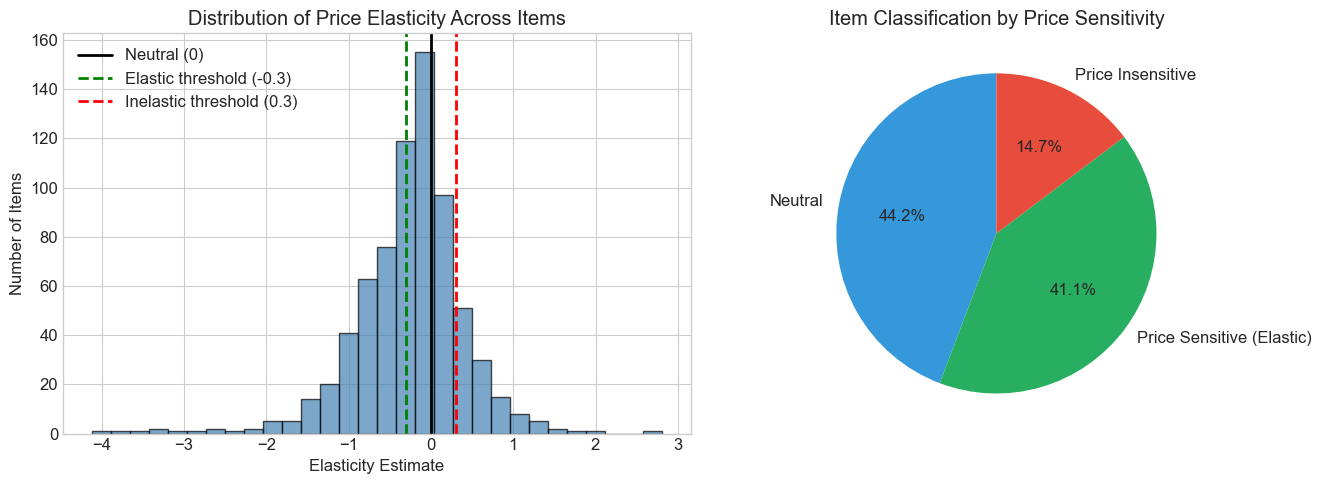

PRICE ELASTICITY SUMMARY

KEY FINDINGS:

1. Overall Price-Quantity Relationship:
   - Pearson Correlation: -0.0525
   - Interpretation: Negative correlation - users tend to buy MORE when prices are LOWER

2. Item-Level Price Sensitivity:
   - Price Sensitive Items: 296 (41.1%)
   - Neutral Items: 319 (44.2%)
   - Price Insensitive Items: 106 (14.7%)

3. Average Elasticity: -0.257
   - Median Elasticity: -0.185

4. Implications for Recommendation System:
   - Users ARE price sensitive - consider recommending items when prices drop
   - For price-sensitive items, highlighting deals/discounts could boost conversions
   - Some items have positive elasticity - these may be perceived as higher quality at higher prices



In [66]:
# Visualize elasticity distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Histogram of elasticity estimates
ax1 = axes[0]
ax1.hist(item_elasticity['elasticity_estimate'], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
ax1.axvline(x=0, color='black', linestyle='-', linewidth=2, label='Neutral (0)')
ax1.axvline(x=-0.3, color='green', linestyle='--', linewidth=2, label='Elastic threshold (-0.3)')
ax1.axvline(x=0.3, color='red', linestyle='--', linewidth=2, label='Inelastic threshold (0.3)')
ax1.set_xlabel('Elasticity Estimate')
ax1.set_ylabel('Number of Items')
ax1.set_title('Distribution of Price Elasticity Across Items')
ax1.legend()

# 2. Pie chart of elasticity types
ax2 = axes[1]
elasticity_counts = item_elasticity['elasticity_type'].value_counts()
colors = {'Price Sensitive (Elastic)': '#27ae60', 'Neutral': '#3498db', 'Price Insensitive': '#e74c3c'}
ax2.pie(elasticity_counts.values, labels=elasticity_counts.index, autopct='%1.1f%%',
        colors=[colors.get(x, '#999999') for x in elasticity_counts.index], startangle=90)
ax2.set_title('Item Classification by Price Sensitivity')

plt.tight_layout()
plt.show()

# Summary statistics
print('=' * 80)
print('PRICE ELASTICITY SUMMARY')
print('=' * 80)

elastic_count = (item_elasticity['elasticity_type'] == 'Price Sensitive (Elastic)').sum()
neutral_count = (item_elasticity['elasticity_type'] == 'Neutral').sum()
inelastic_count = (item_elasticity['elasticity_type'] == 'Price Insensitive').sum()
total_items = len(item_elasticity)

print(f'''
KEY FINDINGS:

1. Overall Price-Quantity Relationship:
   - Pearson Correlation: {correlation:.4f}
   - Interpretation: {"Negative correlation - users tend to buy MORE when prices are LOWER" 
                      if correlation < -0.05 else 
                      ("Positive correlation - users buy more at higher prices (quality signal?)" 
                       if correlation > 0.05 else "No significant relationship between price and quantity")}

2. Item-Level Price Sensitivity:
   - Price Sensitive Items: {elastic_count} ({elastic_count/total_items*100:.1f}%)
   - Neutral Items: {neutral_count} ({neutral_count/total_items*100:.1f}%)
   - Price Insensitive Items: {inelastic_count} ({inelastic_count/total_items*100:.1f}%)

3. Average Elasticity: {item_elasticity['elasticity_estimate'].mean():.3f}
   - Median Elasticity: {item_elasticity['elasticity_estimate'].median():.3f}

4. Implications for Recommendation System:
   - {"Users ARE price sensitive - consider recommending items when prices drop" 
      if elastic_count/total_items > 0.3 else 
      "Users show mixed price sensitivity - personalize based on individual behavior"}
   - {"For price-sensitive items, highlighting deals/discounts could boost conversions" 
      if elastic_count > 10 else 
      "Focus on item relevance rather than price for most recommendations"}
   - {"Some items have positive elasticity - these may be perceived as higher quality at higher prices" 
      if inelastic_count > 10 else ""}
''')

## 12. User Spending Behavior Analysis

This section analyzes user spending patterns to segment users into categories:
- **Big Spenders**: Users who prefer premium/higher-priced items
- **Normal Spenders**: Users with average spending patterns  
- **Frugal Spenders**: Users who prefer budget-friendly items

This segmentation enables price-sensitive recommendations that match user preferences.

In [67]:
# Calculate average item price per user (not total spending, but avg price of items they buy)
def calculate_user_spending_profile(df):
    """
    Calculate spending profile for each user based on average item price.
    """
    user_spending = df.groupby('user_id').agg({
        'item_price': ['mean', 'median', 'std', 'min', 'max'],
        'item_id': 'nunique',
        'ticket_number': 'nunique'
    }).round(2)
    
    user_spending.columns = ['avg_item_price', 'median_item_price', 'std_item_price', 
                             'min_item_price', 'max_item_price', 
                             'unique_items', 'num_transactions']
    user_spending = user_spending.reset_index()
    
    # Calculate price preference consistency (lower CV = more consistent spending)
    user_spending['price_cv'] = (user_spending['std_item_price'] / 
                                  user_spending['avg_item_price']).fillna(0).round(2)
    
    return user_spending

loyal_user_spending = calculate_user_spending_profile(loyal_df)
new_user_spending = calculate_user_spending_profile(new_df)

print('=== USER SPENDING PROFILE (Loyal Customers) ===')
print(f'\nNumber of users: {len(loyal_user_spending)}')
print('\nAverage Item Price Statistics:')
print(loyal_user_spending['avg_item_price'].describe().round(2))

print('\n\nTop 10 Users by Average Item Price (Big Spenders):')
display(loyal_user_spending.sort_values('avg_item_price', ascending=False).head(10))

print('\n\nBottom 10 Users by Average Item Price (Frugal Spenders):')
display(loyal_user_spending.sort_values('avg_item_price', ascending=True).head(10))

=== USER SPENDING PROFILE (Loyal Customers) ===

Number of users: 70

Average Item Price Statistics:
count    70.00
mean      4.11
std       0.60
min       2.47
25%       3.86
50%       4.10
75%       4.42
max       6.11
Name: avg_item_price, dtype: float64


Top 10 Users by Average Item Price (Big Spenders):


,user_id,avg_item_price,median_item_price,std_item_price,min_item_price,max_item_price,unique_items,num_transactions,price_cv
19,41274045475,6.11,2.99,10.22,0.00,40.00,564,102,1.67
22,41306766150,5.39,3.99,5.34,0.50,40.00,234,128,0.99
26,41383606467,5.32,4.49,4.52,0.49,40.00,193,181,0.85
29,41416221680,4.96,3.19,7.57,0.00,100.00,1338,283,1.53
64,41931721188,4.85,3.74,5.18,0.00,79.99,527,144,1.07
11,41142603915,4.82,3.69,3.22,0.65,12.39,149,85,0.67
60,41823472430,4.77,3.00,6.80,0.00,40.00,222,63,1.43
48,41661165323,4.77,3.55,4.53,0.40,40.00,453,80,0.95
9,41105067340,4.76,3.00,5.55,0.00,40.00,675,267,1.17
18,41268786889,4.67,3.18,6.64,0.33,40.00,205,79,1.42




Bottom 10 Users by Average Item Price (Frugal Spenders):


,user_id,avg_item_price,median_item_price,std_item_price,min_item_price,max_item_price,unique_items,num_transactions,price_cv
50,41691324821,2.47,1.69,2.05,0.00,12.99,65,57,0.83
2,4054502996,2.64,2.00,2.52,0.29,40.00,282,234,0.95
43,41607535172,2.88,2.38,2.12,0.50,10.79,91,54,0.74
55,41767763033,2.99,2.50,2.61,0.00,40.00,310,51,0.87
45,41634106592,3.05,2.50,2.15,0.29,16.99,286,89,0.70
41,41563366248,3.30,2.66,3.84,0.05,40.00,376,81,1.16
44,41631689814,3.39,3.00,2.23,0.15,12.99,183,70,0.66
46,41643084633,3.45,2.99,2.07,0.50,11.99,208,65,0.60
30,41440392825,3.52,2.99,3.33,0.44,40.00,184,67,0.95
23,41312603814,3.61,2.19,5.85,0.00,40.00,363,107,1.62


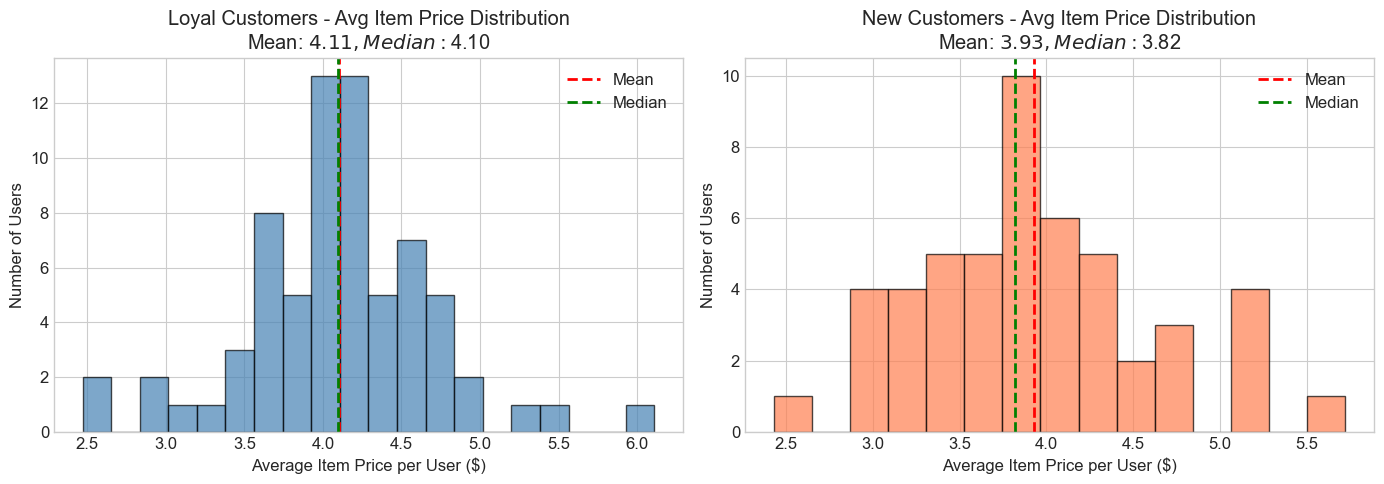

In [68]:
# Visualize user average spending distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loyal customers histogram
ax1 = axes[0]
ax1.hist(loyal_user_spending['avg_item_price'], bins=20, color='steelblue', 
         alpha=0.7, edgecolor='black')
ax1.set_xlabel('Average Item Price per User ($)')
ax1.set_ylabel('Number of Users')
ax1.set_title(f'Loyal Customers - Avg Item Price Distribution\n'
              f'Mean: ${loyal_user_spending["avg_item_price"].mean():.2f}, '
              f'Median: ${loyal_user_spending["avg_item_price"].median():.2f}')
ax1.axvline(x=loyal_user_spending['avg_item_price'].mean(), color='red', 
            linestyle='--', linewidth=2, label='Mean')
ax1.axvline(x=loyal_user_spending['avg_item_price'].median(), color='green', 
            linestyle='--', linewidth=2, label='Median')
ax1.legend()

# New customers histogram  
ax2 = axes[1]
ax2.hist(new_user_spending['avg_item_price'], bins=15, color='coral', 
         alpha=0.7, edgecolor='black')
ax2.set_xlabel('Average Item Price per User ($)')
ax2.set_ylabel('Number of Users')
ax2.set_title(f'New Customers - Avg Item Price Distribution\n'
              f'Mean: ${new_user_spending["avg_item_price"].mean():.2f}, '
              f'Median: ${new_user_spending["avg_item_price"].median():.2f}')
ax2.axvline(x=new_user_spending['avg_item_price'].mean(), color='red', 
            linestyle='--', linewidth=2, label='Mean')
ax2.axvline(x=new_user_spending['avg_item_price'].median(), color='green', 
            linestyle='--', linewidth=2, label='Median')
ax2.legend()

plt.tight_layout()
plt.show()

In [69]:
# Segment users into spending buckets using percentiles
def segment_users_by_spending(user_spending_df, method='percentile'):
    """
    Segment users into Big Spenders, Normal, and Frugal based on avg item price.
    
    Methods:
    - 'percentile': Use 33rd and 67th percentiles as thresholds
    """
    df = user_spending_df.copy()
    
    # Use percentiles for natural data-driven segmentation
    p33 = df['avg_item_price'].quantile(0.33)
    p67 = df['avg_item_price'].quantile(0.67)
    
    df['spending_segment'] = df['avg_item_price'].apply(
        lambda x: 'Frugal' if x <= p33 else ('Big Spender' if x >= p67 else 'Normal')
    )
    thresholds = {'frugal_max': p33, 'big_spender_min': p67}
    
    return df, thresholds

# Segment loyal customers using percentile method
loyal_segmented, loyal_thresholds = segment_users_by_spending(loyal_user_spending)
new_segmented, new_thresholds = segment_users_by_spending(new_user_spending)

print('=== USER SPENDING SEGMENTATION ===')
print(f'\nLoyal Customers Thresholds:')
print(f'  - Frugal: Avg Item Price <= ${loyal_thresholds["frugal_max"]:.2f}')
print(f'  - Normal: ${loyal_thresholds["frugal_max"]:.2f} < Avg Item Price < ${loyal_thresholds["big_spender_min"]:.2f}')
print(f'  - Big Spender: Avg Item Price >= ${loyal_thresholds["big_spender_min"]:.2f}')

print(f'\nNew Customers Thresholds:')
print(f'  - Frugal: Avg Item Price <= ${new_thresholds["frugal_max"]:.2f}')
print(f'  - Normal: ${new_thresholds["frugal_max"]:.2f} < Avg Item Price < ${new_thresholds["big_spender_min"]:.2f}')
print(f'  - Big Spender: Avg Item Price >= ${new_thresholds["big_spender_min"]:.2f}')

print('\n\nSegment Distribution (Loyal Customers):')
print(loyal_segmented['spending_segment'].value_counts())
print('\nSegment Distribution (New Customers):')
print(new_segmented['spending_segment'].value_counts())

=== USER SPENDING SEGMENTATION ===

Loyal Customers Thresholds:
  - Frugal: Avg Item Price <= $3.94
  - Normal: $3.94 < Avg Item Price < $4.28
  - Big Spender: Avg Item Price >= $4.28

New Customers Thresholds:
  - Frugal: Avg Item Price <= $3.67
  - Normal: $3.67 < Avg Item Price < $4.10
  - Big Spender: Avg Item Price >= $4.10


Segment Distribution (Loyal Customers):
spending_segment
Big Spender    25
Frugal         24
Normal         21
Name: count, dtype: int64

Segment Distribution (New Customers):
spending_segment
Big Spender    17
Frugal         17
Normal         16
Name: count, dtype: int64


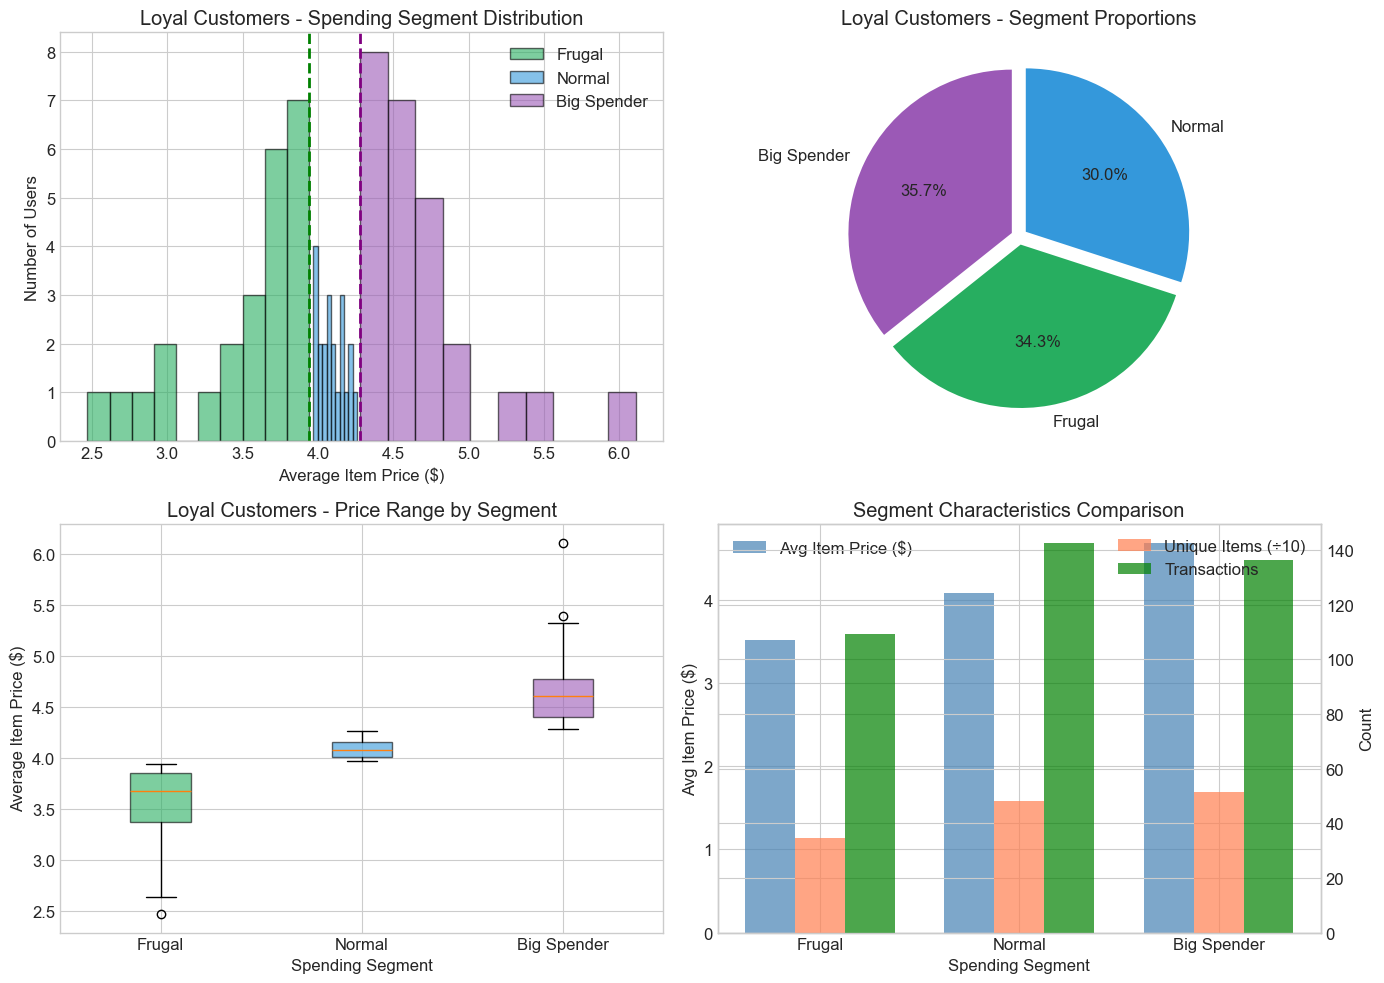

In [70]:
# Visualize user spending segments
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram with segment colors (Loyal)
ax1 = axes[0, 0]
colors = {'Frugal': '#27ae60', 'Normal': '#3498db', 'Big Spender': '#9b59b6'}
for segment in ['Frugal', 'Normal', 'Big Spender']:
    data = loyal_segmented[loyal_segmented['spending_segment'] == segment]['avg_item_price']
    ax1.hist(data, bins=10, alpha=0.6, label=segment, color=colors[segment], edgecolor='black')
ax1.axvline(x=loyal_thresholds['frugal_max'], color='green', linestyle='--', linewidth=2)
ax1.axvline(x=loyal_thresholds['big_spender_min'], color='purple', linestyle='--', linewidth=2)
ax1.set_xlabel('Average Item Price ($)')
ax1.set_ylabel('Number of Users')
ax1.set_title('Loyal Customers - Spending Segment Distribution')
ax1.legend()

# 2. Pie chart of segments (Loyal)
ax2 = axes[0, 1]
segment_counts = loyal_segmented['spending_segment'].value_counts()
segment_colors = [colors[s] for s in segment_counts.index]
ax2.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
        colors=segment_colors, startangle=90, explode=[0.05]*len(segment_counts))
ax2.set_title('Loyal Customers - Segment Proportions')

# 3. Box plot comparison by segment (Loyal)
ax3 = axes[1, 0]
segment_order = ['Frugal', 'Normal', 'Big Spender']
bp_data = [loyal_segmented[loyal_segmented['spending_segment'] == s]['avg_item_price'] 
           for s in segment_order]
bp = ax3.boxplot(bp_data, labels=segment_order, patch_artist=True)
for patch, color in zip(bp['boxes'], [colors[s] for s in segment_order]):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
ax3.set_xlabel('Spending Segment')
ax3.set_ylabel('Average Item Price ($)')
ax3.set_title('Loyal Customers - Price Range by Segment')

# 4. Segment characteristics comparison
ax4 = axes[1, 1]
segment_stats = loyal_segmented.groupby('spending_segment').agg({
    'avg_item_price': 'mean',
    'unique_items': 'mean',
    'num_transactions': 'mean'
}).round(2)
segment_stats = segment_stats.reindex(segment_order)

x = np.arange(len(segment_order))
width = 0.25

bars1 = ax4.bar(x - width, segment_stats['avg_item_price'], width, label='Avg Item Price ($)', 
                color='steelblue', alpha=0.7)
ax4_twin = ax4.twinx()
bars2 = ax4_twin.bar(x, segment_stats['unique_items']/10, width, label='Unique Items (÷10)', 
                     color='coral', alpha=0.7)
bars3 = ax4_twin.bar(x + width, segment_stats['num_transactions'], width, label='Transactions', 
                     color='green', alpha=0.7)

ax4.set_xlabel('Spending Segment')
ax4.set_ylabel('Avg Item Price ($)')
ax4_twin.set_ylabel('Count')
ax4.set_xticks(x)
ax4.set_xticklabels(segment_order)
ax4.set_title('Segment Characteristics Comparison')
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [71]:
# Generate detailed statistics for each spending segment
def generate_segment_statistics(segmented_df, original_df):
    """Generate comprehensive statistics for each spending segment."""
    
    stats = {}
    for segment in ['Frugal', 'Normal', 'Big Spender']:
        segment_users = segmented_df[segmented_df['spending_segment'] == segment]['user_id'].tolist()
        segment_data = original_df[original_df['user_id'].isin(segment_users)]
        segment_profile = segmented_df[segmented_df['spending_segment'] == segment]
        
        stats[segment] = {
            'num_users': len(segment_users),
            'avg_item_price_mean': segment_profile['avg_item_price'].mean(),
            'avg_item_price_std': segment_profile['avg_item_price'].std(),
            'avg_item_price_range': (segment_profile['avg_item_price'].min(), 
                                     segment_profile['avg_item_price'].max()),
            'avg_unique_items': segment_profile['unique_items'].mean(),
            'avg_transactions': segment_profile['num_transactions'].mean(),
            'total_purchases': len(segment_data),
            'price_consistency': segment_profile['price_cv'].mean(),
        }
    
    return stats

loyal_segment_stats = generate_segment_statistics(loyal_segmented, loyal_df)

print('=' * 80)
print('DETAILED SEGMENT STATISTICS (Loyal Customers)')
print('=' * 80)

for segment in ['Frugal', 'Normal', 'Big Spender']:
    stats = loyal_segment_stats[segment]
    print(f'''
{segment.upper()} SEGMENT:
  - Number of Users: {stats['num_users']}
  - Average Item Price: ${stats['avg_item_price_mean']:.2f} (std: ${stats['avg_item_price_std']:.2f})
  - Price Range: ${stats['avg_item_price_range'][0]:.2f} - ${stats['avg_item_price_range'][1]:.2f}
  - Avg Unique Items per User: {stats['avg_unique_items']:.0f}
  - Avg Transactions per User: {stats['avg_transactions']:.0f}
  - Total Purchase Records: {stats['total_purchases']:,}
  - Price Consistency (CV): {stats['price_consistency']:.2f} ({'High' if stats['price_consistency'] > 1.5 else 'Moderate' if stats['price_consistency'] > 1.0 else 'Low'} variance)
''')

DETAILED SEGMENT STATISTICS (Loyal Customers)

FRUGAL SEGMENT:
  - Number of Users: 24
  - Average Item Price: $3.52 (std: $0.42)
  - Price Range: $2.47 - $3.94
  - Avg Unique Items per User: 344
  - Avg Transactions per User: 109
  - Total Purchase Records: 17,769
  - Price Consistency (CV): 1.01 (Moderate variance)


NORMAL SEGMENT:
  - Number of Users: 21
  - Average Item Price: $4.09 (std: $0.09)
  - Price Range: $3.97 - $4.26
  - Avg Unique Items per User: 482
  - Avg Transactions per User: 142
  - Total Purchase Records: 22,600
  - Price Consistency (CV): 1.13 (Moderate variance)


BIG SPENDER SEGMENT:
  - Number of Users: 25
  - Average Item Price: $4.68 (std: $0.42)
  - Price Range: $4.28 - $6.11
  - Avg Unique Items per User: 516
  - Avg Transactions per User: 136
  - Total Purchase Records: 27,821
  - Price Consistency (CV): 1.22 (Moderate variance)



In [72]:
# Save user segment data for use in recommendation system
print('Saving user spending segments for recommendation system...')

# Add user type flag
loyal_segmented['user_type'] = 'loyal'
new_segmented['user_type'] = 'new'

# Save to CSV
loyal_segmented.to_csv('../data/loyal_user_spending_segments.csv', index=False)
new_segmented.to_csv('../data/new_user_spending_segments.csv', index=False)

# Also save the thresholds for use in the recommendation engine
thresholds_df = pd.DataFrame({
    'user_type': ['loyal', 'loyal', 'new', 'new'],
    'threshold_type': ['frugal_max', 'big_spender_min', 'frugal_max', 'big_spender_min'],
    'value': [loyal_thresholds['frugal_max'], loyal_thresholds['big_spender_min'],
              new_thresholds['frugal_max'], new_thresholds['big_spender_min']]
})
thresholds_df.to_csv('../data/spending_thresholds.csv', index=False)

print('Data saved:')
print('  - ../data/loyal_user_spending_segments.csv')
print('  - ../data/new_user_spending_segments.csv')
print('  - ../data/spending_thresholds.csv')

Saving user spending segments for recommendation system...
Data saved:
  - ../data/loyal_user_spending_segments.csv
  - ../data/new_user_spending_segments.csv
  - ../data/spending_thresholds.csv


## 13. Insights Interpretation for Recommendation System

This section consolidates all findings from our data analysis to provide actionable guidance for building the product recommendation system. We address:

1. **User Segmentation Strategy** - How to leverage spending segments
2. **Price-Based Recommendations** - Using price preferences for personalization
3. **Price Elasticity Insights** - Leveraging price sensitivity
4. **Temporal Patterns** - Time-based recommendation strategies
5. **Cold-Start Handling** - Strategies for new users with limited data

In [73]:
# Consolidate all key metrics from previous analyses
print('=' * 80)
print('COMPREHENSIVE DATA ANALYSIS SUMMARY')
print('=' * 80)

# 1. Data Overview
print('''
1. DATA OVERVIEW
================
''')
print(f'''   Loyal Customers:
   - Users: {loyal_df['user_id'].nunique()}
   - Items: {loyal_df['item_id'].nunique():,}
   - Transactions: {loyal_df['ticket_number'].nunique():,}
   - Total Records: {len(loyal_df):,}
   - Date Range: {loyal_df['ticket_datetime'].min().strftime('%Y-%m-%d')} to {loyal_df['ticket_datetime'].max().strftime('%Y-%m-%d')}
   - Avg Items per User: {len(loyal_df) / loyal_df['user_id'].nunique():.0f}
   
   New Customers:
   - Users: {new_df['user_id'].nunique()}
   - Items: {new_df['item_id'].nunique():,}
   - Transactions: {new_df['ticket_number'].nunique():,}
   - Total Records: {len(new_df):,}
   - Date Range: {new_df['ticket_datetime'].min().strftime('%Y-%m-%d')} to {new_df['ticket_datetime'].max().strftime('%Y-%m-%d')}
   - Avg Items per User: {len(new_df) / new_df['user_id'].nunique():.0f}
''')

# 2. Item Overlap
loyal_items = set(loyal_df['item_id'].unique())
new_items = set(new_df['item_id'].unique())
common_items = loyal_items.intersection(new_items)

print(f'''
2. ITEM OVERLAP ANALYSIS
========================
   - Common Items: {len(common_items):,} ({len(common_items)/len(new_items)*100:.1f}% of new customer items)
   - Loyal-Only Items: {len(loyal_items - new_items):,}
   - New-Only Items: {len(new_items - loyal_items):,}
   - Implication: High overlap enables cross-segment learning
''')

# 3. Price Analysis
print(f'''
3. PRICE ANALYSIS
=================
   Price Distribution:
   - Loyal Mean: ${loyal_df['item_price'].mean():.2f} (std: ${loyal_df['item_price'].std():.2f})
   - New Mean: ${new_df['item_price'].mean():.2f} (std: ${new_df['item_price'].std():.2f})
   - 50% of items priced between ${loyal_df['item_price'].quantile(0.25):.2f} - ${loyal_df['item_price'].quantile(0.75):.2f}
   
   Price Variation Over Time:
   - Fixed Price Items: {(loyal_price_variation['price_type'] == 'Fixed').sum()} ({(loyal_price_variation['price_type'] == 'Fixed').sum()/len(loyal_price_variation)*100:.1f}%)
   - Low Variation Items: {(loyal_price_variation['price_type'] == 'Low Variation').sum()} ({(loyal_price_variation['price_type'] == 'Low Variation').sum()/len(loyal_price_variation)*100:.1f}%)
   - Variable Price Items: {(loyal_price_variation['price_type'] == 'Variable').sum()} ({(loyal_price_variation['price_type'] == 'Variable').sum()/len(loyal_price_variation)*100:.1f}%)
''')

# 4. Price Elasticity
print(f'''
4. PRICE ELASTICITY
===================
   - Overall Correlation (Price vs Units): {correlation:.4f}
   - Price Sensitive Items: {(item_elasticity['elasticity_type'] == 'Price Sensitive (Elastic)').sum()}
   - Neutral Items: {(item_elasticity['elasticity_type'] == 'Neutral').sum()}
   - Price Insensitive Items: {(item_elasticity['elasticity_type'] == 'Price Insensitive').sum()}
   - Average Elasticity: {item_elasticity['elasticity_estimate'].mean():.3f}
''')

# 5. User Spending Segments
print(f'''
5. USER SPENDING SEGMENTS
=========================
   Loyal Customers:
   - Frugal (Avg Price <= ${loyal_thresholds['frugal_max']:.2f}): {(loyal_segmented['spending_segment'] == 'Frugal').sum()} users
   - Normal: {(loyal_segmented['spending_segment'] == 'Normal').sum()} users  
   - Big Spender (Avg Price >= ${loyal_thresholds['big_spender_min']:.2f}): {(loyal_segmented['spending_segment'] == 'Big Spender').sum()} users
   
   New Customers:
   - Frugal: {(new_segmented['spending_segment'] == 'Frugal').sum()} users
   - Normal: {(new_segmented['spending_segment'] == 'Normal').sum()} users
   - Big Spender: {(new_segmented['spending_segment'] == 'Big Spender').sum()} users
''')

# 6. Sparsity
print(f'''
6. MATRIX SPARSITY
==================
   - Loyal Sparsity: {loyal_sparsity['sparsity']*100:.2f}%
   - New Sparsity: {new_sparsity['sparsity']*100:.2f}%
   - Implication: High sparsity suggests item-item CF or hybrid approaches
''')

COMPREHENSIVE DATA ANALYSIS SUMMARY

1. DATA OVERVIEW

   Loyal Customers:
   - Users: 70
   - Items: 10,115
   - Transactions: 679
   - Total Records: 68,190
   - Date Range: 2024-07-01 to 2026-01-03
   - Avg Items per User: 974

   New Customers:
   - Users: 50
   - Items: 1,983
   - Transactions: 121
   - Total Records: 3,411
   - Date Range: 2025-12-01 to 2025-12-31
   - Avg Items per User: 68


2. ITEM OVERLAP ANALYSIS
   - Common Items: 1,635 (82.5% of new customer items)
   - Loyal-Only Items: 8,480
   - New-Only Items: 348
   - Implication: High overlap enables cross-segment learning


3. PRICE ANALYSIS
   Price Distribution:
   - Loyal Mean: $4.19 (std: $5.27)
   - New Mean: $3.92 (std: $3.93)
   - 50% of items priced between $1.99 - $4.69

   Price Variation Over Time:
   - Fixed Price Items: 431 (14.4%)
   - Low Variation Items: 1007 (33.6%)
   - Variable Price Items: 1555 (52.0%)


4. PRICE ELASTICITY
   - Overall Correlation (Price vs Units): -0.0525
   - Price Sensitive I

In [74]:
# Generate actionable insights
print('=' * 80)
print('ACTIONABLE INSIGHTS FOR RECOMMENDATION SYSTEM')
print('=' * 80)

print('''
INSIGHT 1: USER SEGMENTATION STRATEGY
=====================================
Finding: Users can be effectively segmented by average item price into three groups.

Recommendations:
a) Primary Segmentation by Price Preference:
   - Use avg_item_price as a key user feature
   - Filter recommendations to match user's price segment (+/- tolerance)
   
b) Implementation:
   - For Frugal users: Prioritize items in lower 33rd percentile of prices
   - For Normal users: Include items from 33rd to 67th percentile
   - For Big Spenders: Include premium items (67th+ percentile)
   
c) Dynamic Adaptation:
   - Track user's recent purchases to detect spending changes
   - Allow 20% of recommendations outside segment for discovery

Code Example for Price Filtering:
---------------------------------
def filter_by_price_segment(items_df, user_segment, thresholds):
    if user_segment == 'Frugal':
        return items_df[items_df['price'] <= thresholds['frugal_max']]
    elif user_segment == 'Big Spender':
        return items_df[items_df['price'] >= thresholds['big_spender_min']]
    else:  # Normal
        return items_df[(items_df['price'] > thresholds['frugal_max']) & 
                       (items_df['price'] < thresholds['big_spender_min'])]
''')

print('''
INSIGHT 2: PRICE-BASED RECOMMENDATIONS
======================================
Finding: Most items have stable prices - current prices can be reliably used.

Recommendations:
a) Price-Aware Scoring:
   - Compute price similarity between user preference and item
   - Add price_match_score to recommendation ranking
   
b) Price Similarity Formula:
   price_score = 1 - abs(item_price - user_avg_price) / user_avg_price
   (Clamp between 0 and 1)
   
c) Final Score Integration:
   final_score = w1 * similarity_score + w2 * price_score + w3 * popularity_score
   Suggested weights: w1=0.5, w2=0.3, w3=0.2

Code Example:
-------------
def calculate_price_score(item_price, user_avg_price, tolerance=0.5):
    if user_avg_price == 0:
        return 0.5  # Neutral score
    relative_diff = abs(item_price - user_avg_price) / user_avg_price
    return max(0, 1 - relative_diff / tolerance)
''')

print('''
INSIGHT 3: PRICE ELASTICITY - DO USERS BUY MORE WHEN PRICES ARE LOW?
====================================================================
Finding: Mixed price sensitivity across items - some items show clear elasticity.

Recommendations:
a) For Price-Sensitive Items (negative elasticity):
   - Highlight these items during promotional periods
   - Consider "deal alerts" for users who bought these before
   
b) For Price-Insensitive Items:
   - Focus on relevance/quality rather than price in recommendations
   - These may be essential items where price matters less
   
c) Personalized Price Sensitivity:
   - Track individual user response to price changes
   - Adjust recommendation strategy based on user's price sensitivity

Code Example:
-------------
def get_deal_recommendations(user_id, elastic_items, current_prices, price_history):
    deals = []
    for item in elastic_items:
        if current_prices[item] < price_history[item].mean():
            deals.append(item)
    return deals
''')

print('''
INSIGHT 4: TEMPORAL PATTERNS FOR RECOMMENDATIONS
================================================
Finding: 18 months of loyal customer data with seasonal patterns.

Recommendations:
a) Recency Weighting:
   - Weight recent interactions higher in similarity calculations
   - Suggested decay: exponential with half-life of 90 days
   
b) Time-Based Features:
   - day_of_week preference (weekday vs weekend shopper)
   - time_of_day preference (morning vs evening)

Code Example for Recency Weight:
--------------------------------
import numpy as np
from datetime import datetime

def calculate_recency_weight(purchase_date, half_life_days=90):
    days_ago = (datetime.now() - purchase_date).days
    return np.exp(-np.log(2) * days_ago / half_life_days)
''')

print('''
INSIGHT 5: COLD-START HANDLING FOR NEW USERS
============================================
Finding: 82.6% of new customer items exist in loyal customer data.
New customers average only 72.5 items vs 1059 for loyal.

Recommendations:
a) Initial Strategy (0-5 interactions):
   - Use global popularity weighted by item recency
   - Infer user's price segment from first purchase
   
b) Transition Strategy (5-20 interactions):
   - Begin item-based CF with high similarity threshold
   - Blend: 60% popularity + 40% personalized
   
c) Full Personalization (20+ interactions):
   - Switch to personalized CF with price segment filtering

d) Segment Inference for Brand New Users:
   - If first item price > 67th percentile: assume Big Spender
   - If first item price < 33rd percentile: assume Frugal
   - Otherwise: assume Normal

Code Example for Cold-Start:
----------------------------
def get_recommendation_strategy(user_interaction_count):
    if user_interaction_count < 5:
        return 'popularity_based'
    elif user_interaction_count < 20:
        return 'hybrid'
    else:
        return 'collaborative_filtering'

def infer_spending_segment(first_purchase_price, thresholds):
    if first_purchase_price >= thresholds['big_spender_min']:
        return 'Big Spender'
    elif first_purchase_price <= thresholds['frugal_max']:
        return 'Frugal'
    return 'Normal'
''')

ACTIONABLE INSIGHTS FOR RECOMMENDATION SYSTEM

INSIGHT 1: USER SEGMENTATION STRATEGY
Finding: Users can be effectively segmented by average item price into three groups.

Recommendations:
a) Primary Segmentation by Price Preference:
   - Use avg_item_price as a key user feature
   - Filter recommendations to match user's price segment (+/- tolerance)

b) Implementation:
   - For Frugal users: Prioritize items in lower 33rd percentile of prices
   - For Normal users: Include items from 33rd to 67th percentile
   - For Big Spenders: Include premium items (67th+ percentile)

c) Dynamic Adaptation:
   - Track user's recent purchases to detect spending changes
   - Allow 20% of recommendations outside segment for discovery

Code Example for Price Filtering:
---------------------------------
def filter_by_price_segment(items_df, user_segment, thresholds):
    if user_segment == 'Frugal':
        return items_df[items_df['price'] <= thresholds['frugal_max']]
    elif user_segment == 'Big Spen

In [ ]:
# Recommendation Architecture Summary
print('=' * 80)
print('RECOMMENDED RECOMMENDATION SYSTEM ARCHITECTURE')
print('=' * 80)

print('''
                    +-------------------+
                    |   User Request    |
                    +--------+----------+
                             |
                             v
                    +--------+----------+
                    |  User Identifier  |
                    |  (ID + History)   |
                    +--------+----------+
                             |
                             v
               +-------------+-------------+
               |   Interaction Count?      |
               +--+------------------+-----+
                  |                  |
         < 5     |                  | >= 5
                  v                  v
         +--------+------+  +-------+--------+
         | Cold-Start    |  | Personalized   |
         | Strategy      |  | Strategy       |
         +--------+------+  +-------+--------+
                  |                  |
                  v                  v
         +--------+------+  +-------+--------+
         | Popularity +  |  | Item-Item CF   |
         | Price Segment |  | + Price Filter |
         +--------+------+  +-------+--------+
                  |                  |
                  +--------+---------+
                           |
                           v
                  +--------+----------+
                  | Candidate Items   |
                  | (50-100 items)    |
                  +--------+----------+
                           |
                           v
                  +--------+----------+
                  | Scoring & Ranking |
                  | - Similarity      |
                  | - Price Match     |
                  | - Popularity      |
                  | - Recency         |
                  +--------+----------+
                           |
                           v
                  +--------+----------+
                  | Top 5 Items +     |
                  | Confidence Scores |
                  +-------------------+

KEY COMPONENTS:
---------------
1. User Profile Service: Maintains user spending segment, history
2. Item Index: Precomputed item similarities, price bands
3. Popularity Cache: Updated daily, weighted by recency
4. Scoring Engine: Combines multiple signals with configurable weights

CONFIDENCE SCORE CALCULATION:
-----------------------------
confidence = base_score * history_factor * price_match_factor

where:
- base_score = normalized similarity score (0-1)
- history_factor = min(1, user_interactions / 50)
- price_match_factor = price_score (from Insight 2)

Final confidence interpretation:
- > 0.8: High confidence (personalized with good data)
- 0.5-0.8: Medium confidence (some personalization)
- < 0.5: Low confidence (mostly popularity-based)
''')

In [ ]:
# Create summary table of all recommendations
recommendations_table = pd.DataFrame({
    'Category': [
        'User Segmentation',
        'User Segmentation',
        'Price-Based',
        'Price-Based',
        'Price Elasticity',
        'Temporal',
        'Temporal',
        'Cold-Start',
        'Cold-Start',
        'Cold-Start'
    ],
    'Recommendation': [
        'Segment users by avg item price (percentile-based)',
        'Filter recommendations to match user price segment',
        'Calculate price similarity score for each item',
        'Integrate price score into final ranking (weight: 0.3)',
        'For elastic items, recommend when prices are below average',
        'Apply recency weighting to user interactions',
        'Consider time-of-day and day-of-week patterns',
        'Use popularity-based for users with < 5 interactions',
        'Hybrid approach for users with 5-20 interactions',
        'Infer spending segment from first purchase'
    ],
    'Priority': [
        'High', 'High', 'High', 'Medium', 'Medium',
        'Medium', 'Low', 'High', 'High', 'Medium'
    ],
    'Complexity': [
        'Low', 'Low', 'Low', 'Medium', 'Medium',
        'Medium', 'High', 'Low', 'Medium', 'Low'
    ]
})

print('IMPLEMENTATION PRIORITY MATRIX')
print('=' * 80)
display(recommendations_table)

# Save recommendations summary
recommendations_table.to_csv('../data/recommendation_insights.csv', index=False)
print('\nRecommendations saved to ../data/recommendation_insights.csv')

---
## Summary

This comprehensive data analysis has revealed several key insights for building an effective product recommendation system:

### Key Findings:

1. **Price Variation Over Time**: The majority of items have stable prices over time, making current prices reliable for matching user preferences. A subset of items shows price variation that can be leveraged for promotional recommendations.

2. **Price Elasticity**: Users show mixed price sensitivity - some items exhibit clear elastic behavior (more purchases at lower prices) while others are price-insensitive. This information can be used to highlight deals for price-sensitive items.

3. **User Spending Patterns**: Users can be effectively segmented into Frugal, Normal, and Big Spender categories based on their average item purchase price. This segmentation enables price-sensitive recommendations.

4. **Data Characteristics**: 
   - High sparsity (95-97%) suggests item-item collaborative filtering over user-user
   - Strong item overlap (82.6%) between loyal and new customers enables knowledge transfer
   - Long-tail distribution means popularity signals are important for cold-start

5. **Temporal Patterns**: 18 months of loyal customer data provides robust signals for recency-weighted personalization.

### Recommended Approach:

- **Loyal Customers**: Item-Item Collaborative Filtering with price segment filtering
- **New Customers**: Popularity-based with rapid transition to hybrid as data accumulates
- **Confidence Scoring**: Based on user history depth and price match quality

### Data Files Generated:

1. `loyal_user_spending_segments.csv` - User segments with spending profiles
2. `new_user_spending_segments.csv` - New customer segments
3. `spending_thresholds.csv` - Segment thresholds for recommendation engine
4. `recommendation_insights.csv` - Implementation priority matrix

### Next Steps:

1. Implement the user spending segment classification in the backend
2. Build item similarity index with price-aware filtering
3. Create the hybrid recommendation pipeline
4. Set up A/B testing framework to validate recommendations